

---





# Ensembling Training with YOLO8m, YOLO8l and YOLO8x on Custom Data



#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [1]:
!nvidia-smi

Thu Jun 15 06:46:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
################ Mounting the Google Drive #################
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/ensembling-yolo8/YOLOv8m")

directory_path = "/content/drive/MyDrive/ensembling-yolo8/YOLOv8m"

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/ensembling-yolo8/YOLOv8m


In [4]:
!ls

datasets  runs	yolov8m.pt


In [5]:
###### Installing RoboFlow ###################
!pip install roboflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
################# installing ultralytics ###############

!pip install ultralytics



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 15.1 MB/s eta 0:00:00


In [9]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/107.7 GB disk)


In [10]:
from ultralytics import YOLO

from IPython.display import display, Image

In [21]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="1y2suOpZcCBrV3qiK5SN")
project = rf.workspace("al-amin").project("rail-road-crossing")
dataset = project.version(4).download("yolov8")


/content/drive/MyDrive/ensembling-yolo8/YOLOv8m/datasets
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to rail-road-crossing-4 in yolov8:: 100%|██████████| 5382/5382 [00:34<00:00, 157.71it/s]


In [24]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content/drive/MyDrive/ensembling-yolo8/YOLOv8m
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/drive/MyDrive/ensembling-yolo8/YOLOv8m/datasets/rail-road-crossing-4/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

In [8]:
!ls {HOME}/runs/detect/train5/

args.yaml					    train_batch2205.jpg
confusion_matrix.png				    train_batch2206.jpg
events.out.tfevents.1686812097.972c9d201e8d.3126.0  train_batch2207.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content/drive/MyDrive/ensembling-yolo8/YOLOv8m


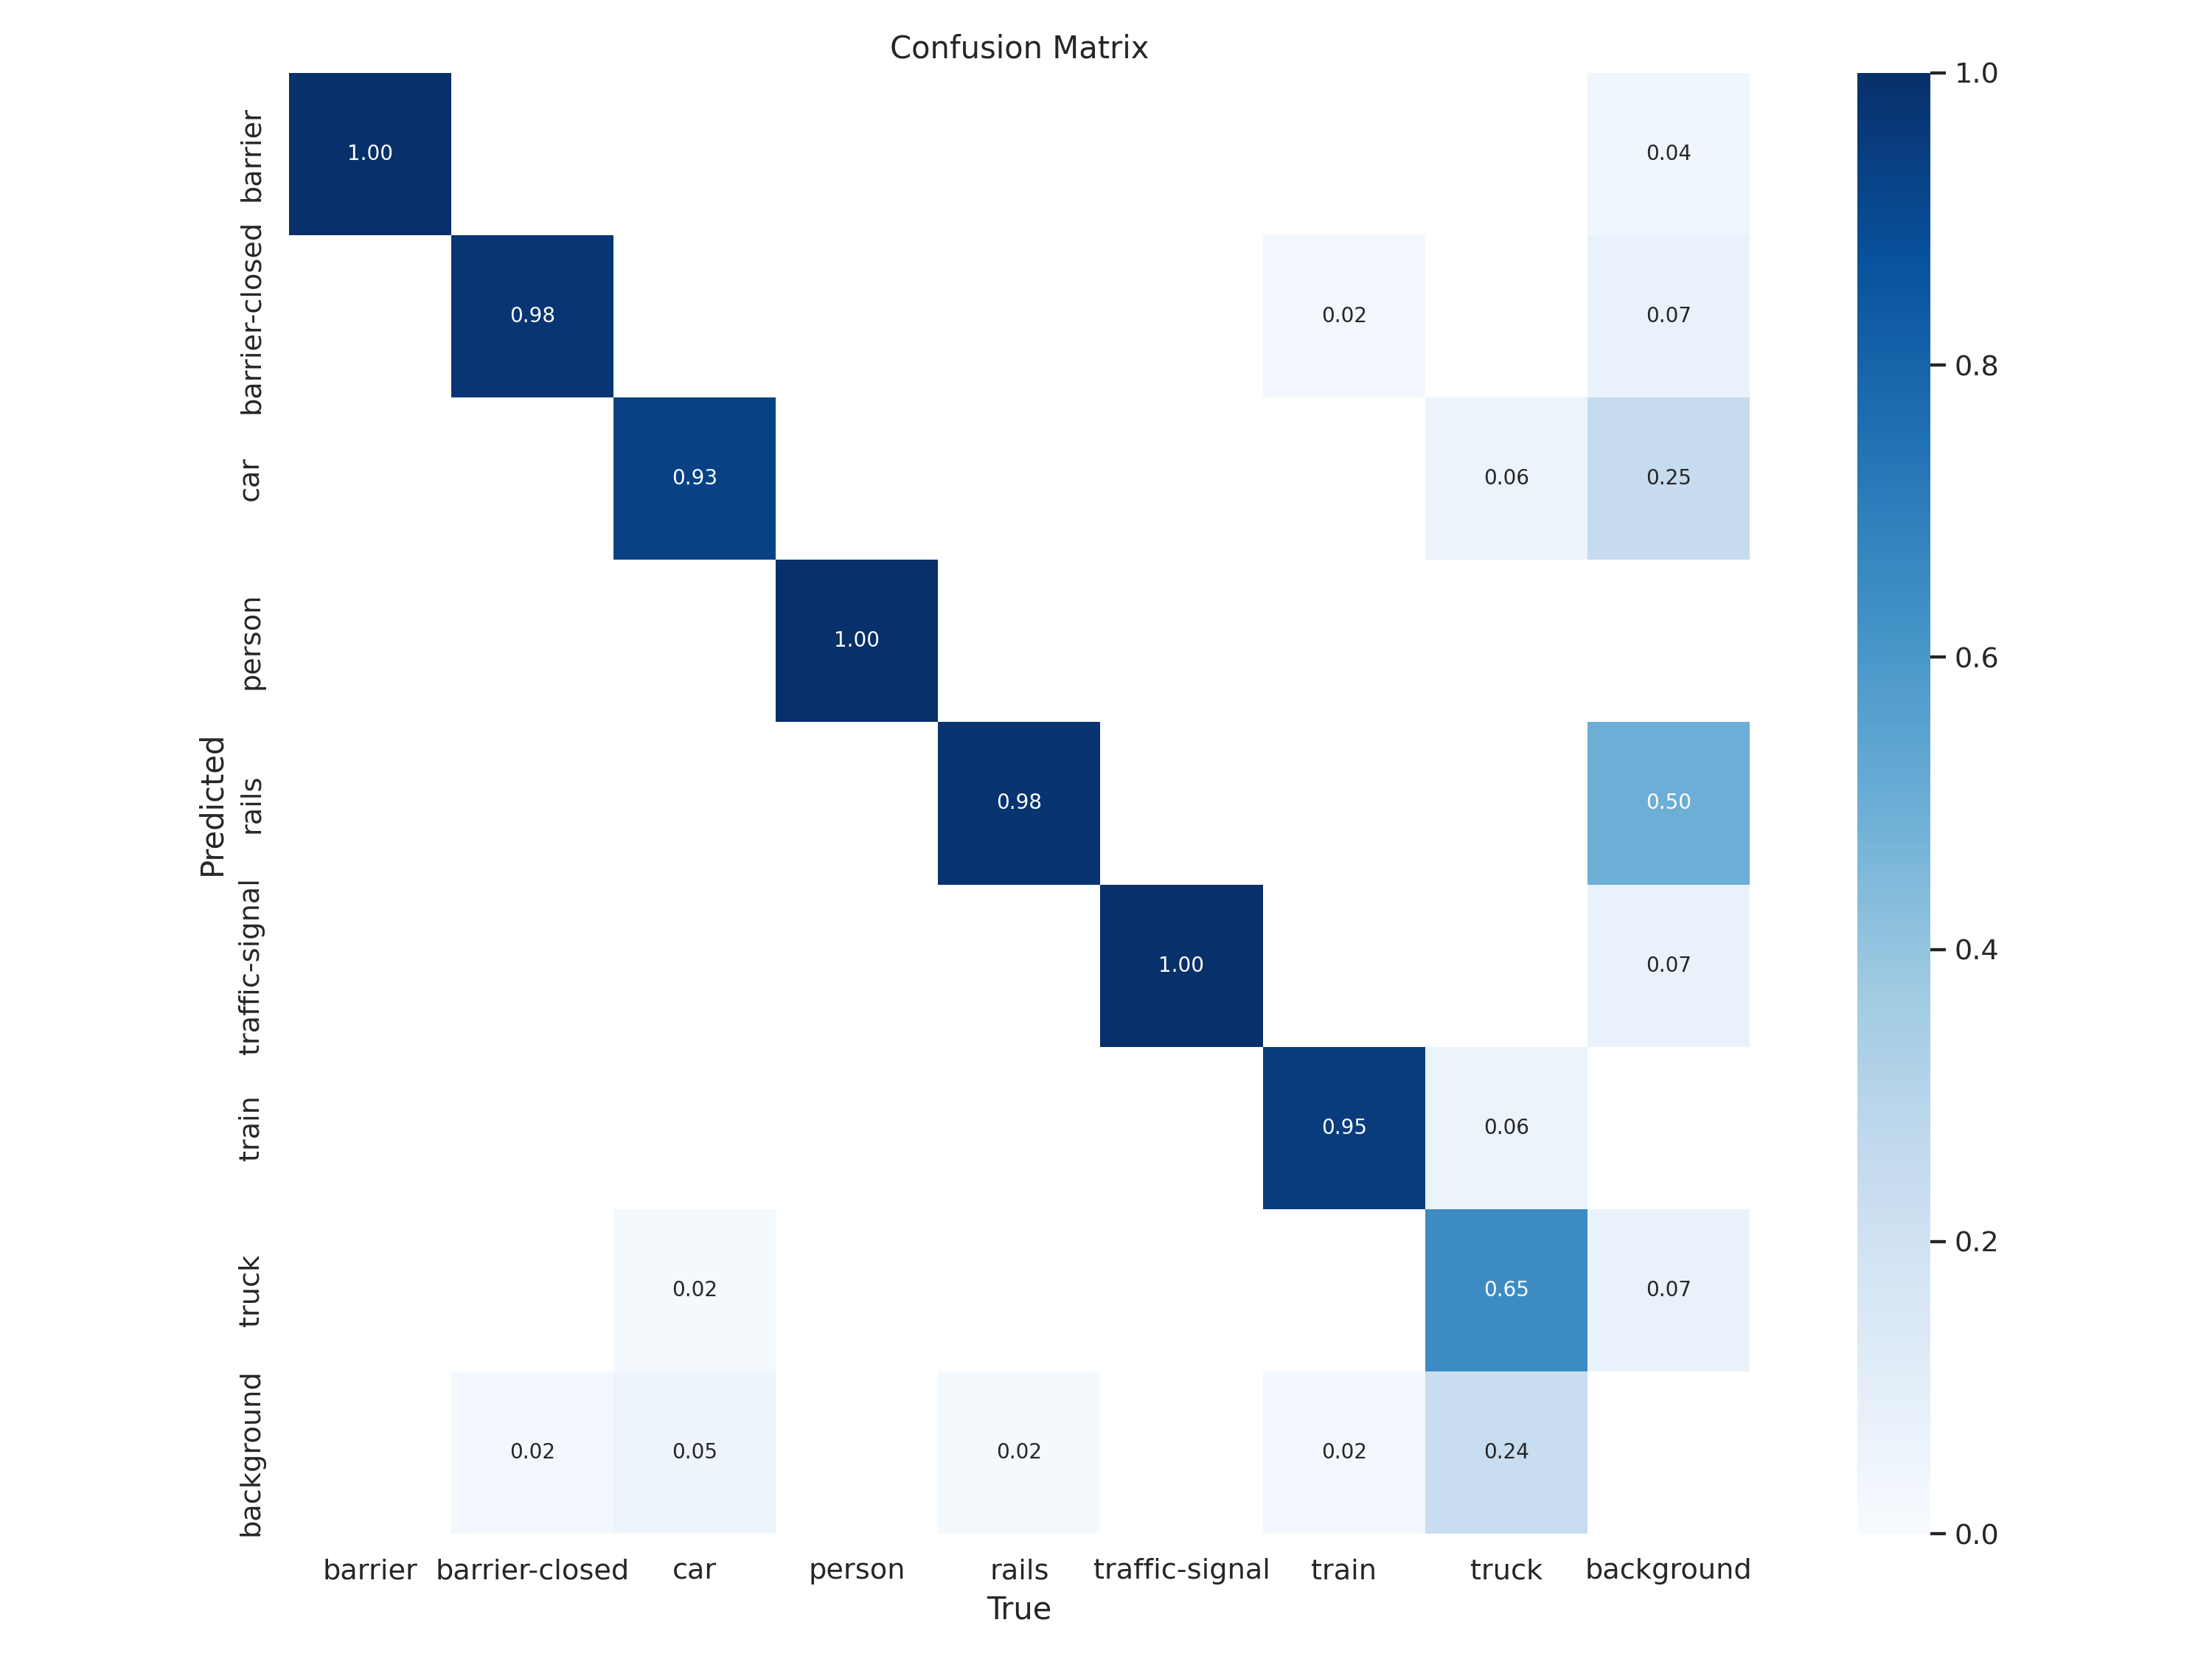

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=800)

/content/drive/MyDrive/ensembling-yolo8/YOLOv8m


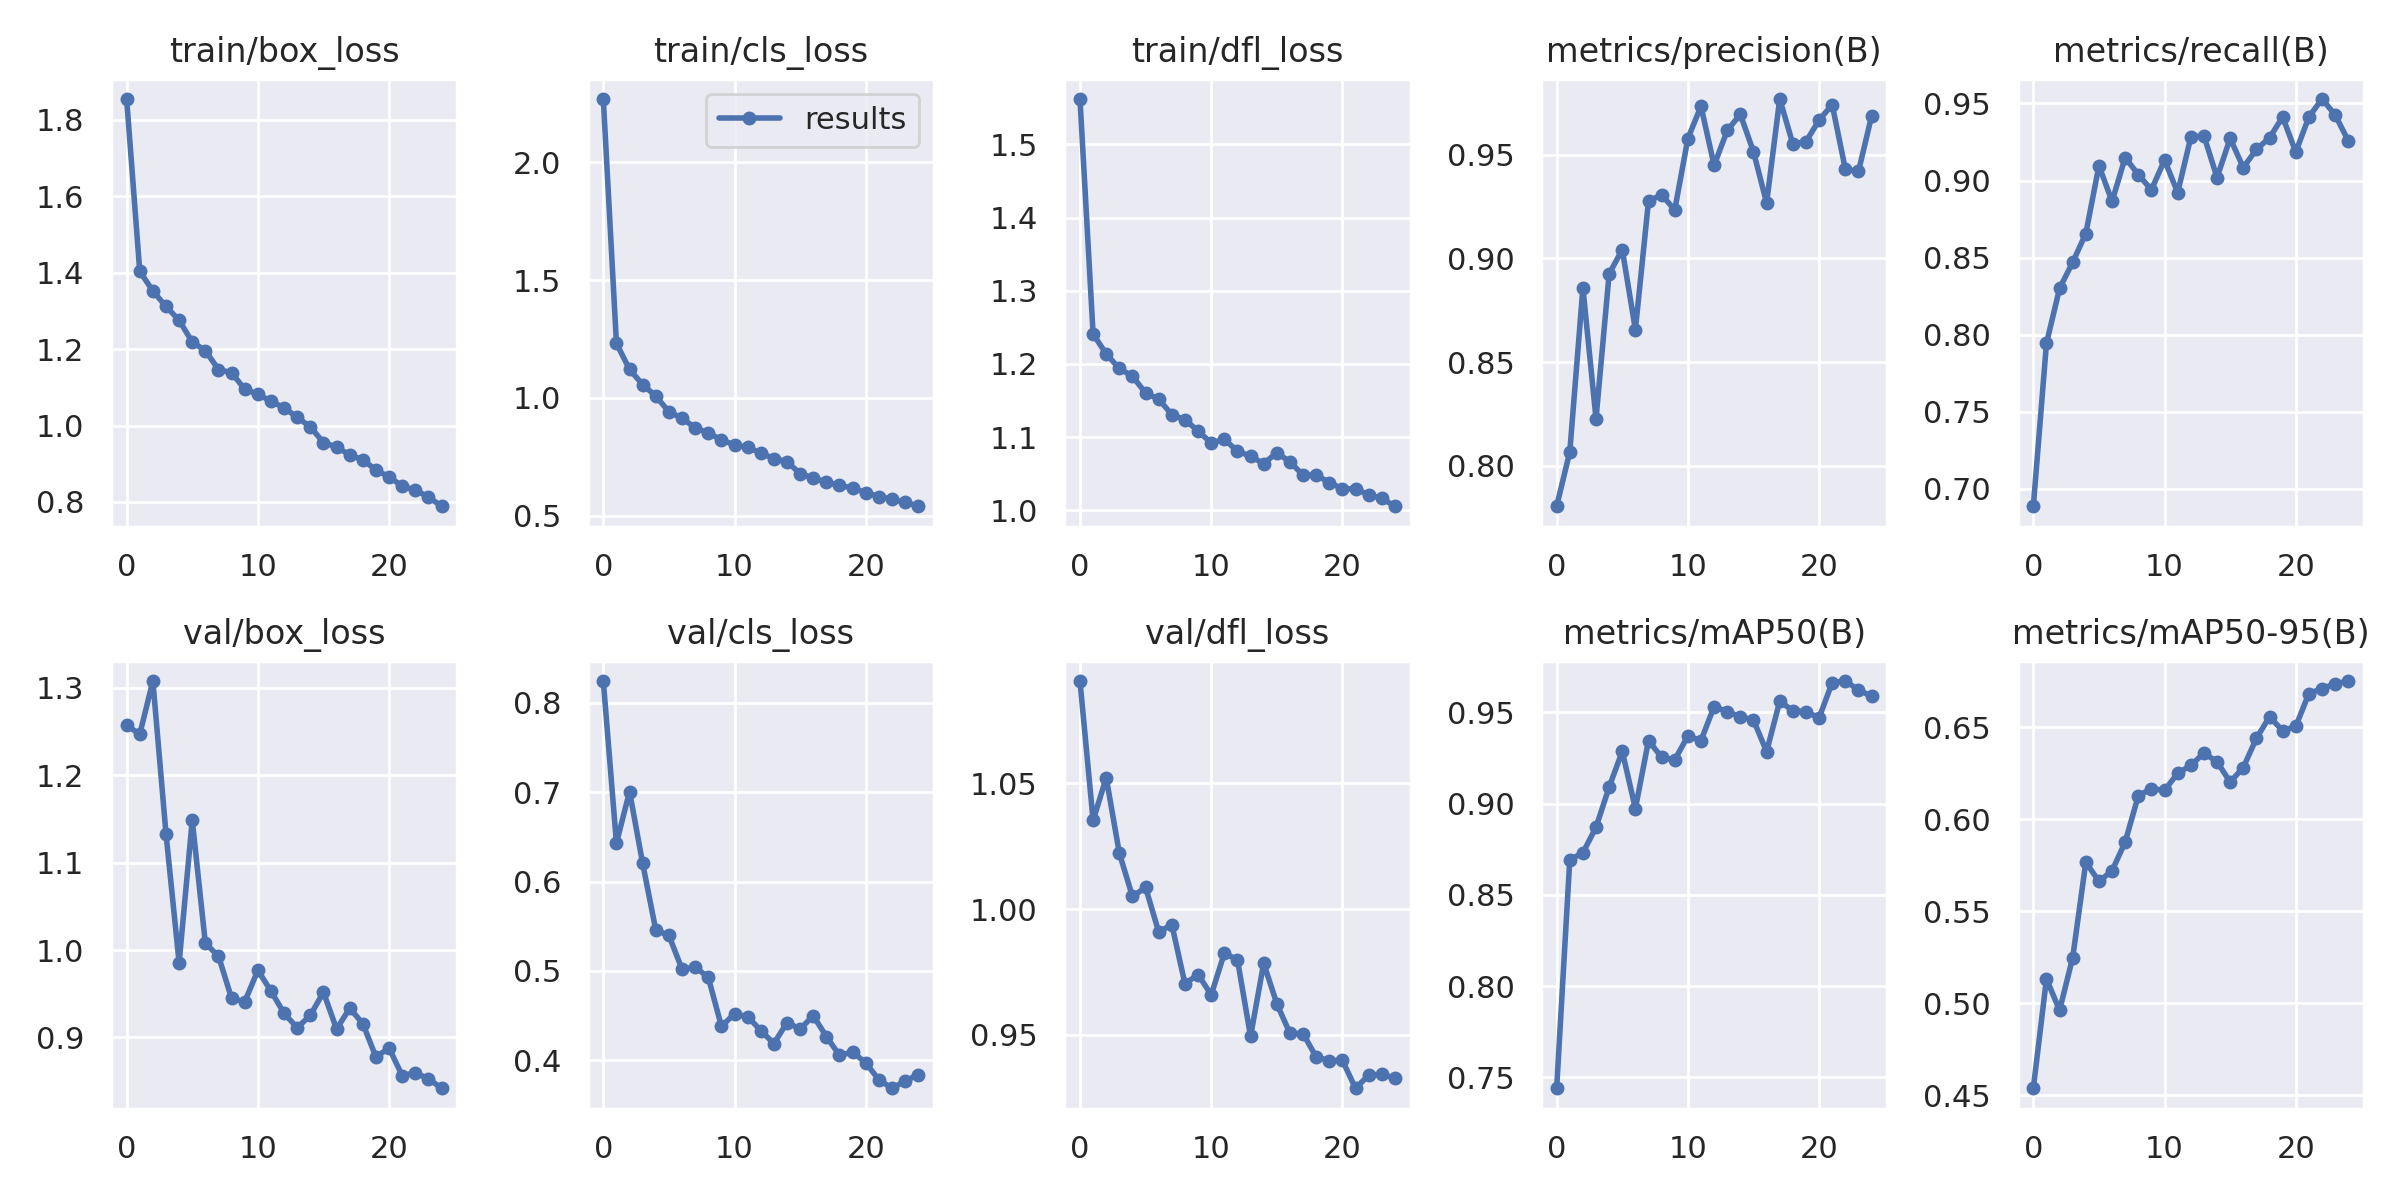

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/results.png', width=800)

/content


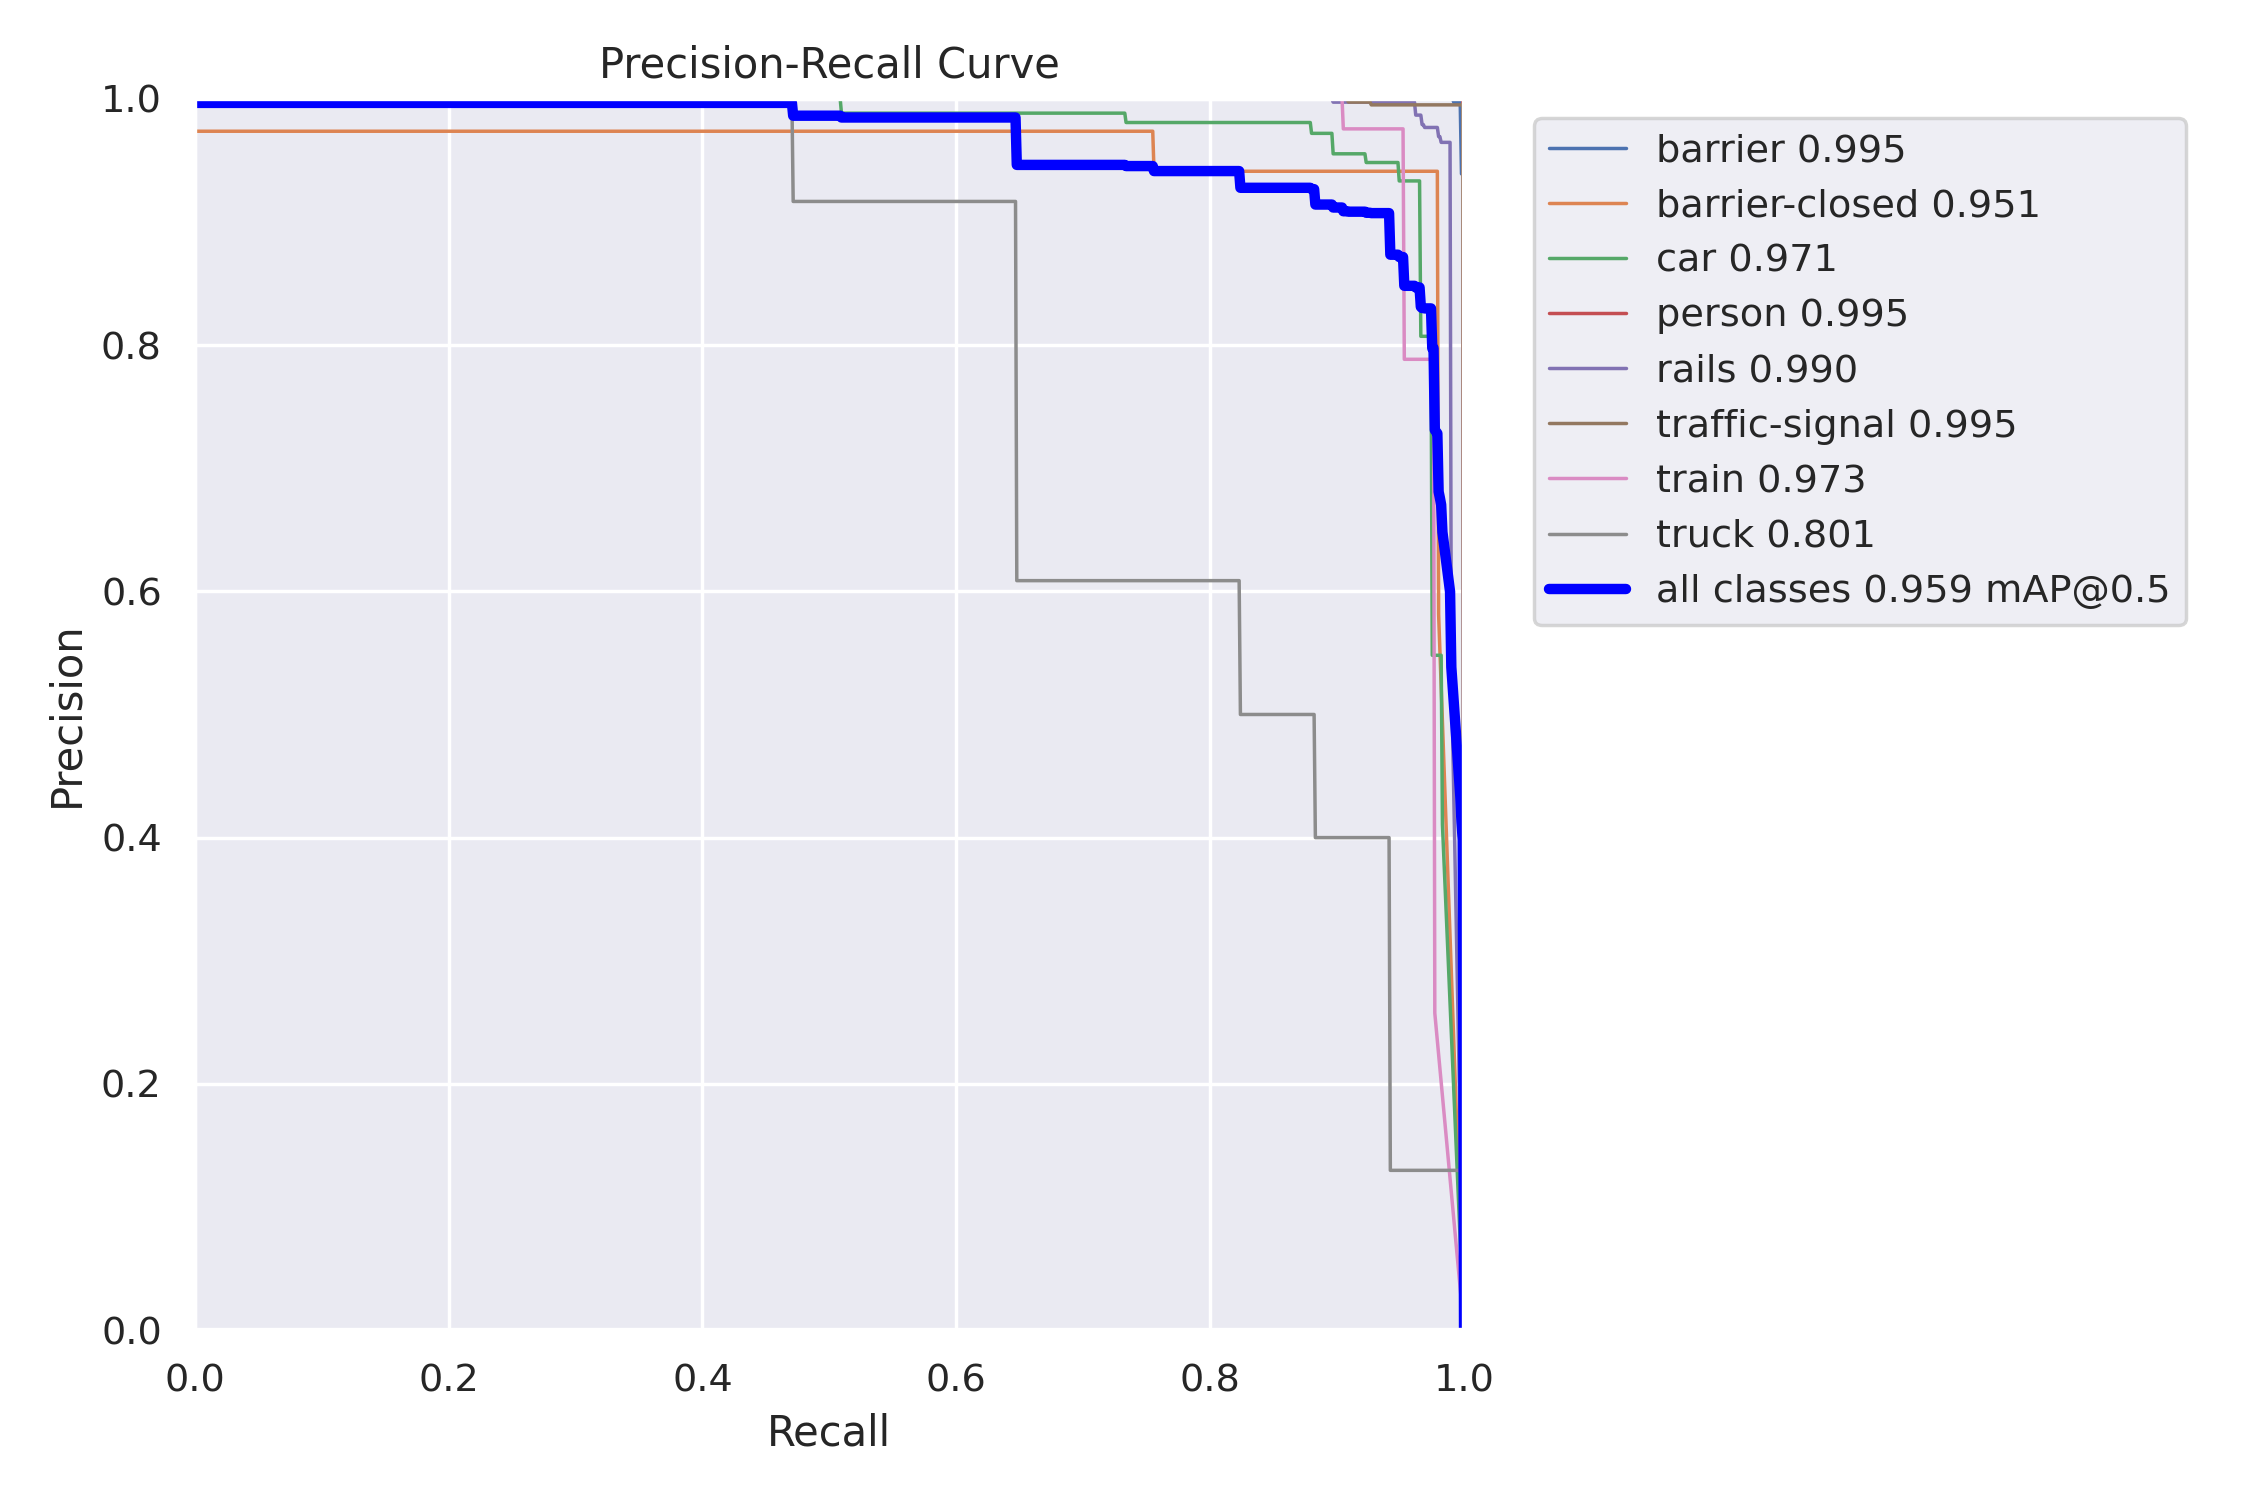

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/PR_curve.png', width=800)

/content


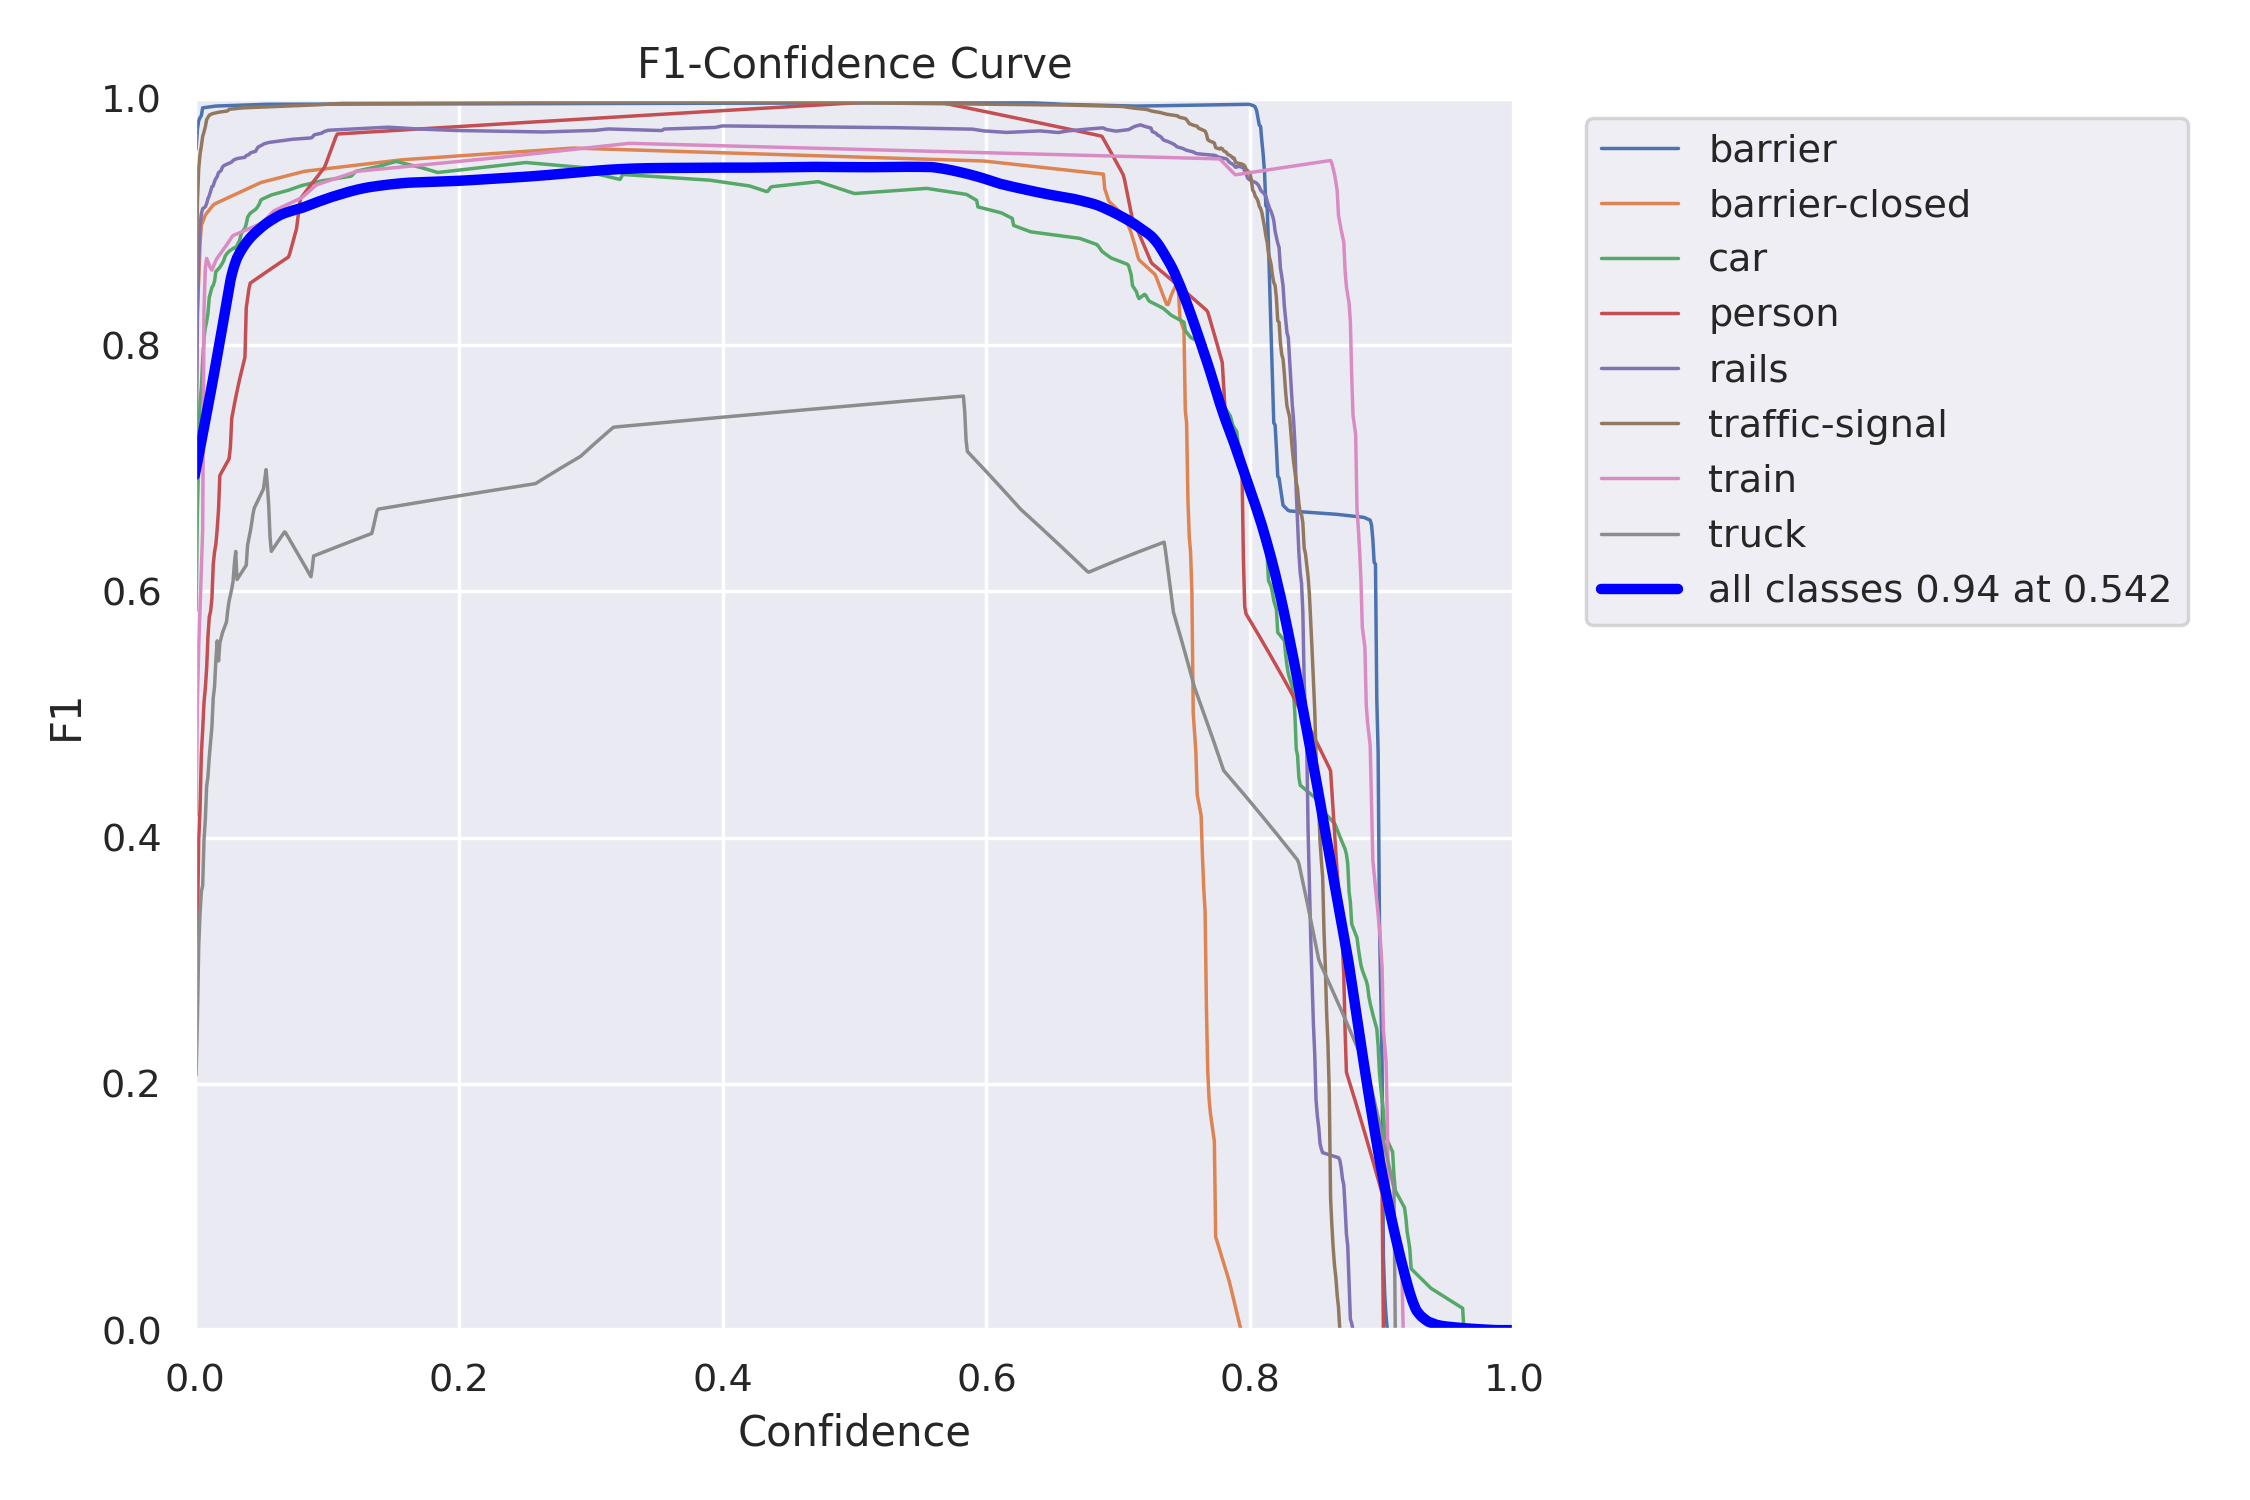

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/F1_curve.png', width=800)

/content/drive/MyDrive/ensembling-yolo8/YOLOv8m


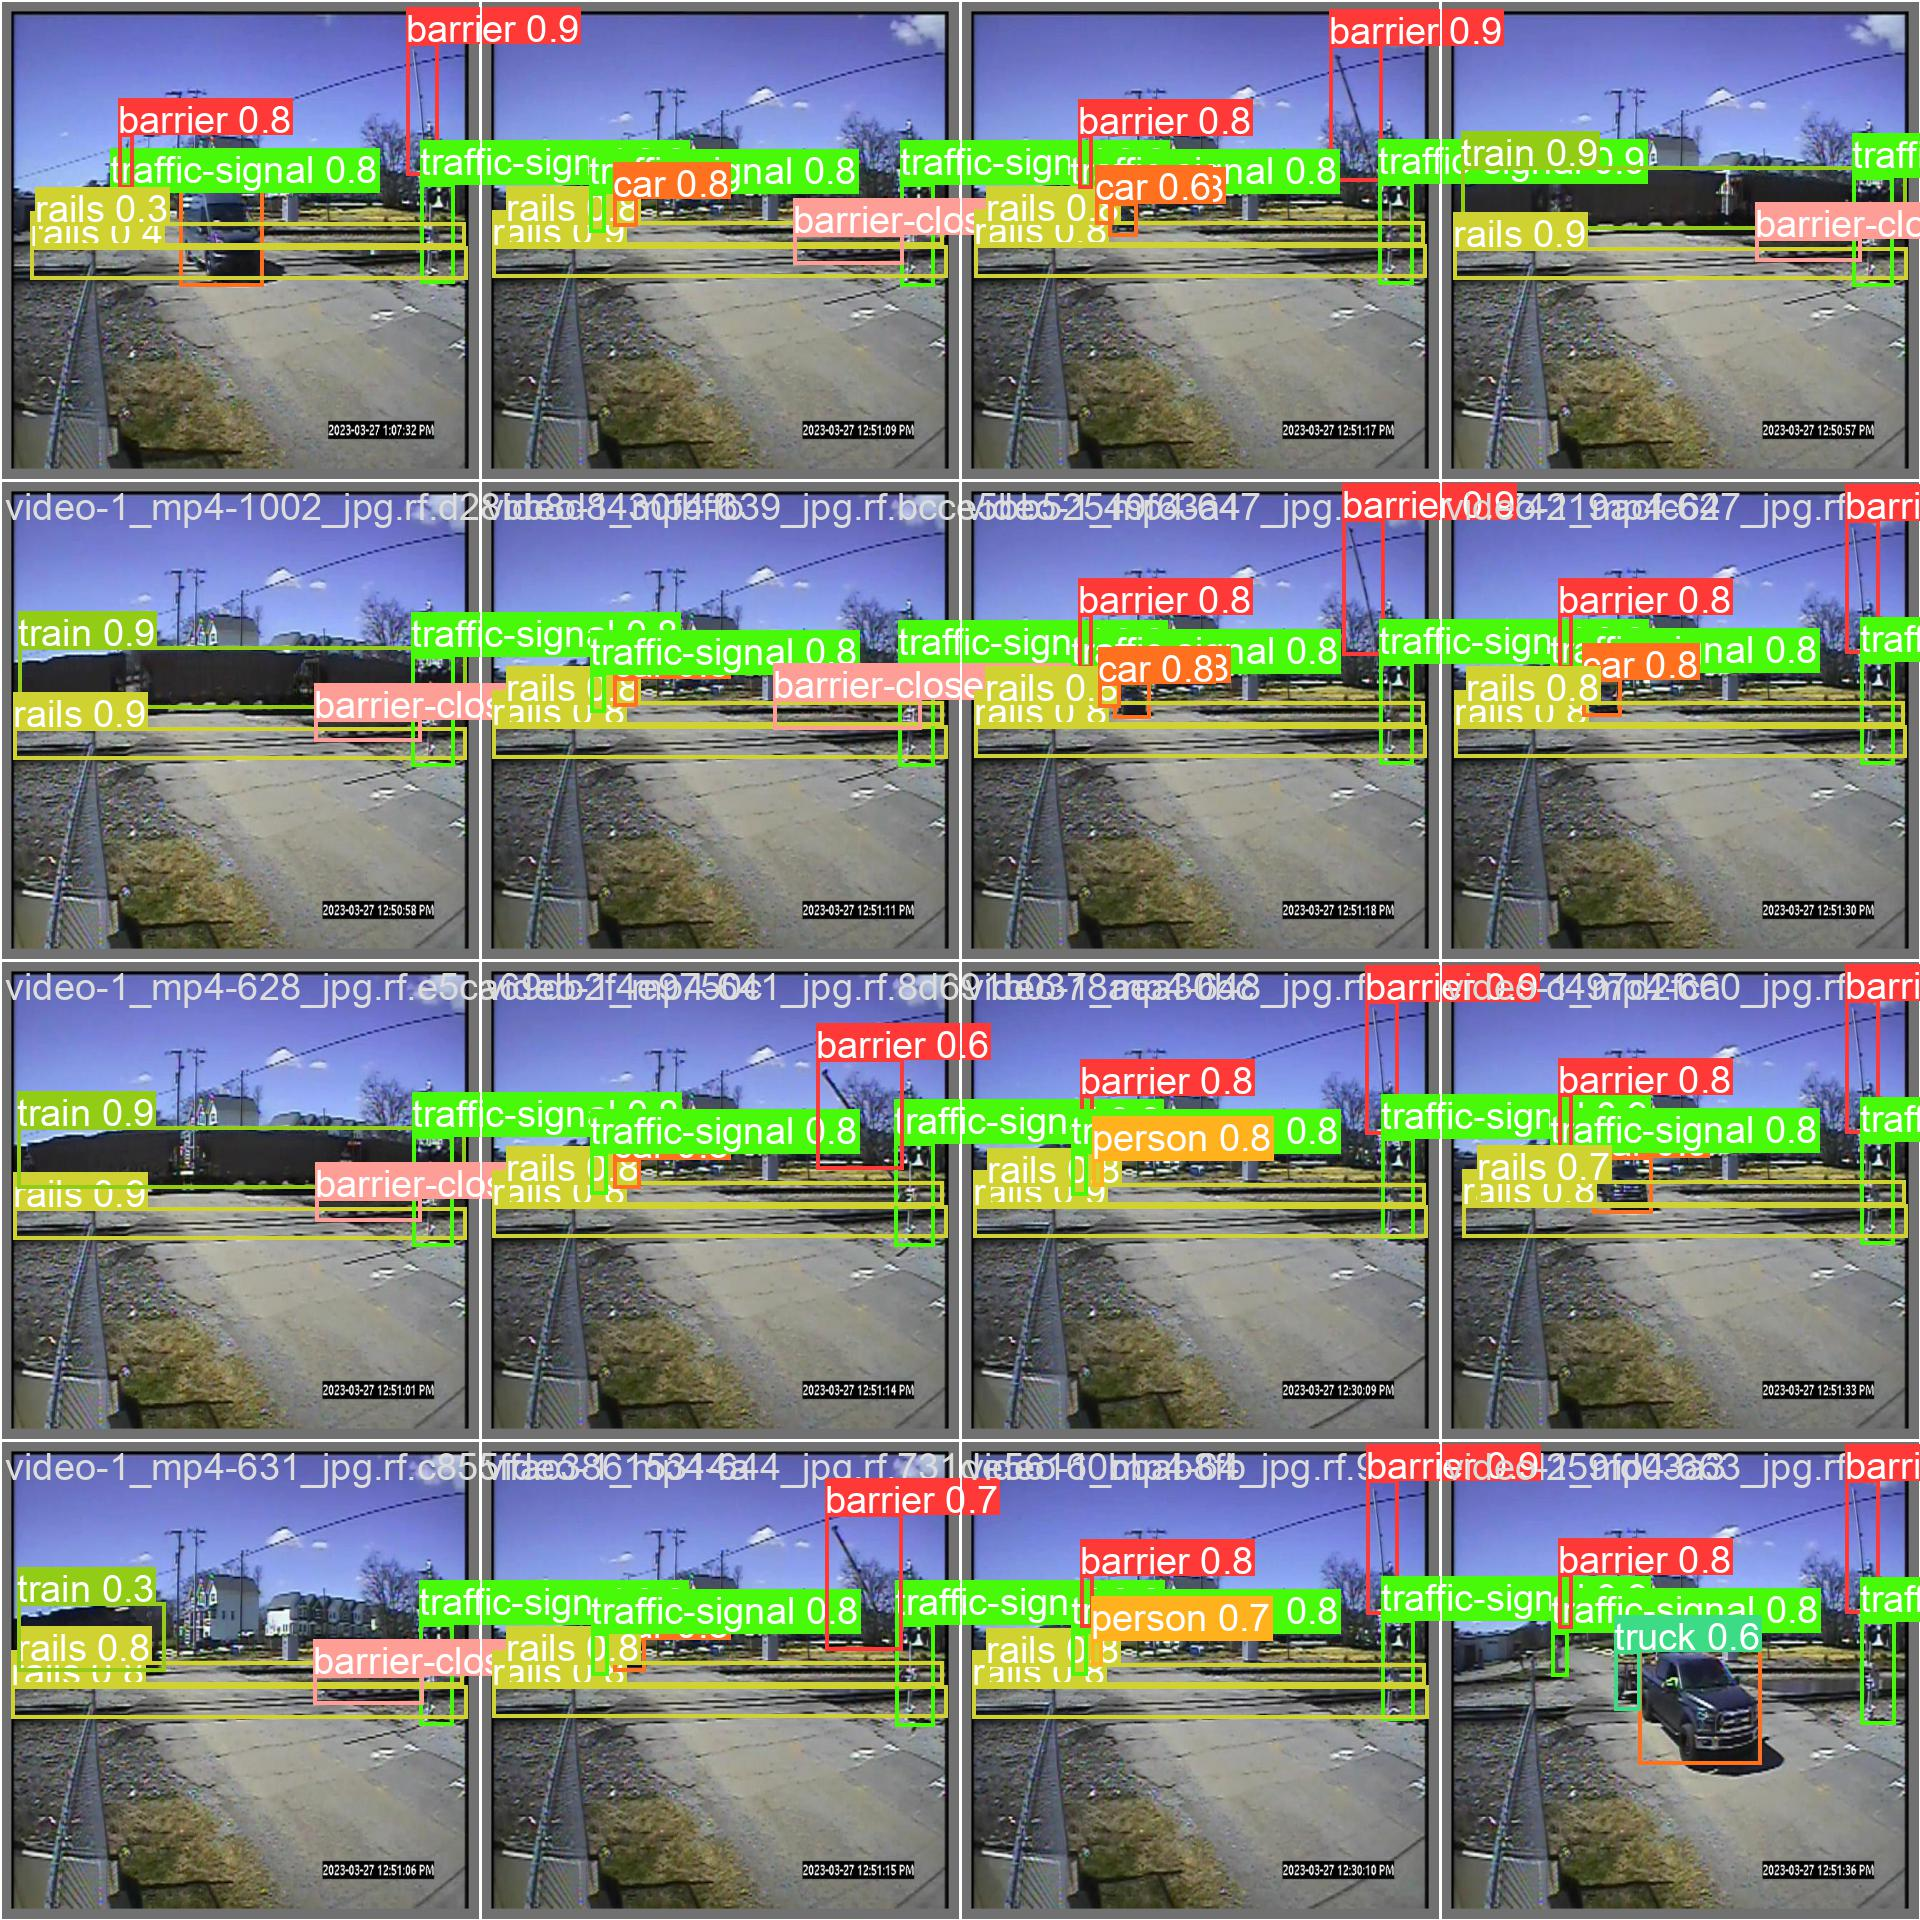

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/val_batch0_pred.jpg', width=800)

## Validate Custom Model

In [29]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train5/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/ensembling-yolo8/YOLOv8m
2023-06-15 07:50:45.719107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 07:50:46.997311: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/ensembling-yolo8/YOLOv8m/datasets/rail-road-crossing-4/valid/labels.cache... 224 images, 0 backgrounds, 0 corrupt: 100% 224/224 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:11<00:00,  1.18it/s]
                   all        224       

## Training of YOLOv8l

In [11]:

import os
os.chdir("/content/drive/MyDrive/ensembling-yolo8/YOLOv8l")

directory_path = "/content/drive/MyDrive/ensembling-yolo8/YOLOv8l"

In [12]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/ensembling-yolo8/YOLOv8l


In [15]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="1y2suOpZcCBrV3qiK5SN")
project = rf.workspace("al-amin").project("rail-road-crossing")
dataset = project.version(4).download("yolov8")


/content/drive/MyDrive/ensembling-yolo8/YOLOv8l/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to rail-road-crossing-4 in yolov8:: 100%|██████████| 5382/5382 [00:32<00:00, 166.35it/s]


In [16]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content/drive/MyDrive/ensembling-yolo8/YOLOv8l
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=/content/drive/MyDrive/ensembling-yolo8/YOLOv8l/datasets/rail-road-crossing-4/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

In [17]:
!ls {HOME}/runs/detect/train3/

args.yaml					    train_batch2205.jpg
confusion_matrix.png				    train_batch2206.jpg
events.out.tfevents.1686836773.480dcf3167b5.2622.0  train_batch2207.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content/drive/MyDrive/ensembling-yolo8/YOLOv8l


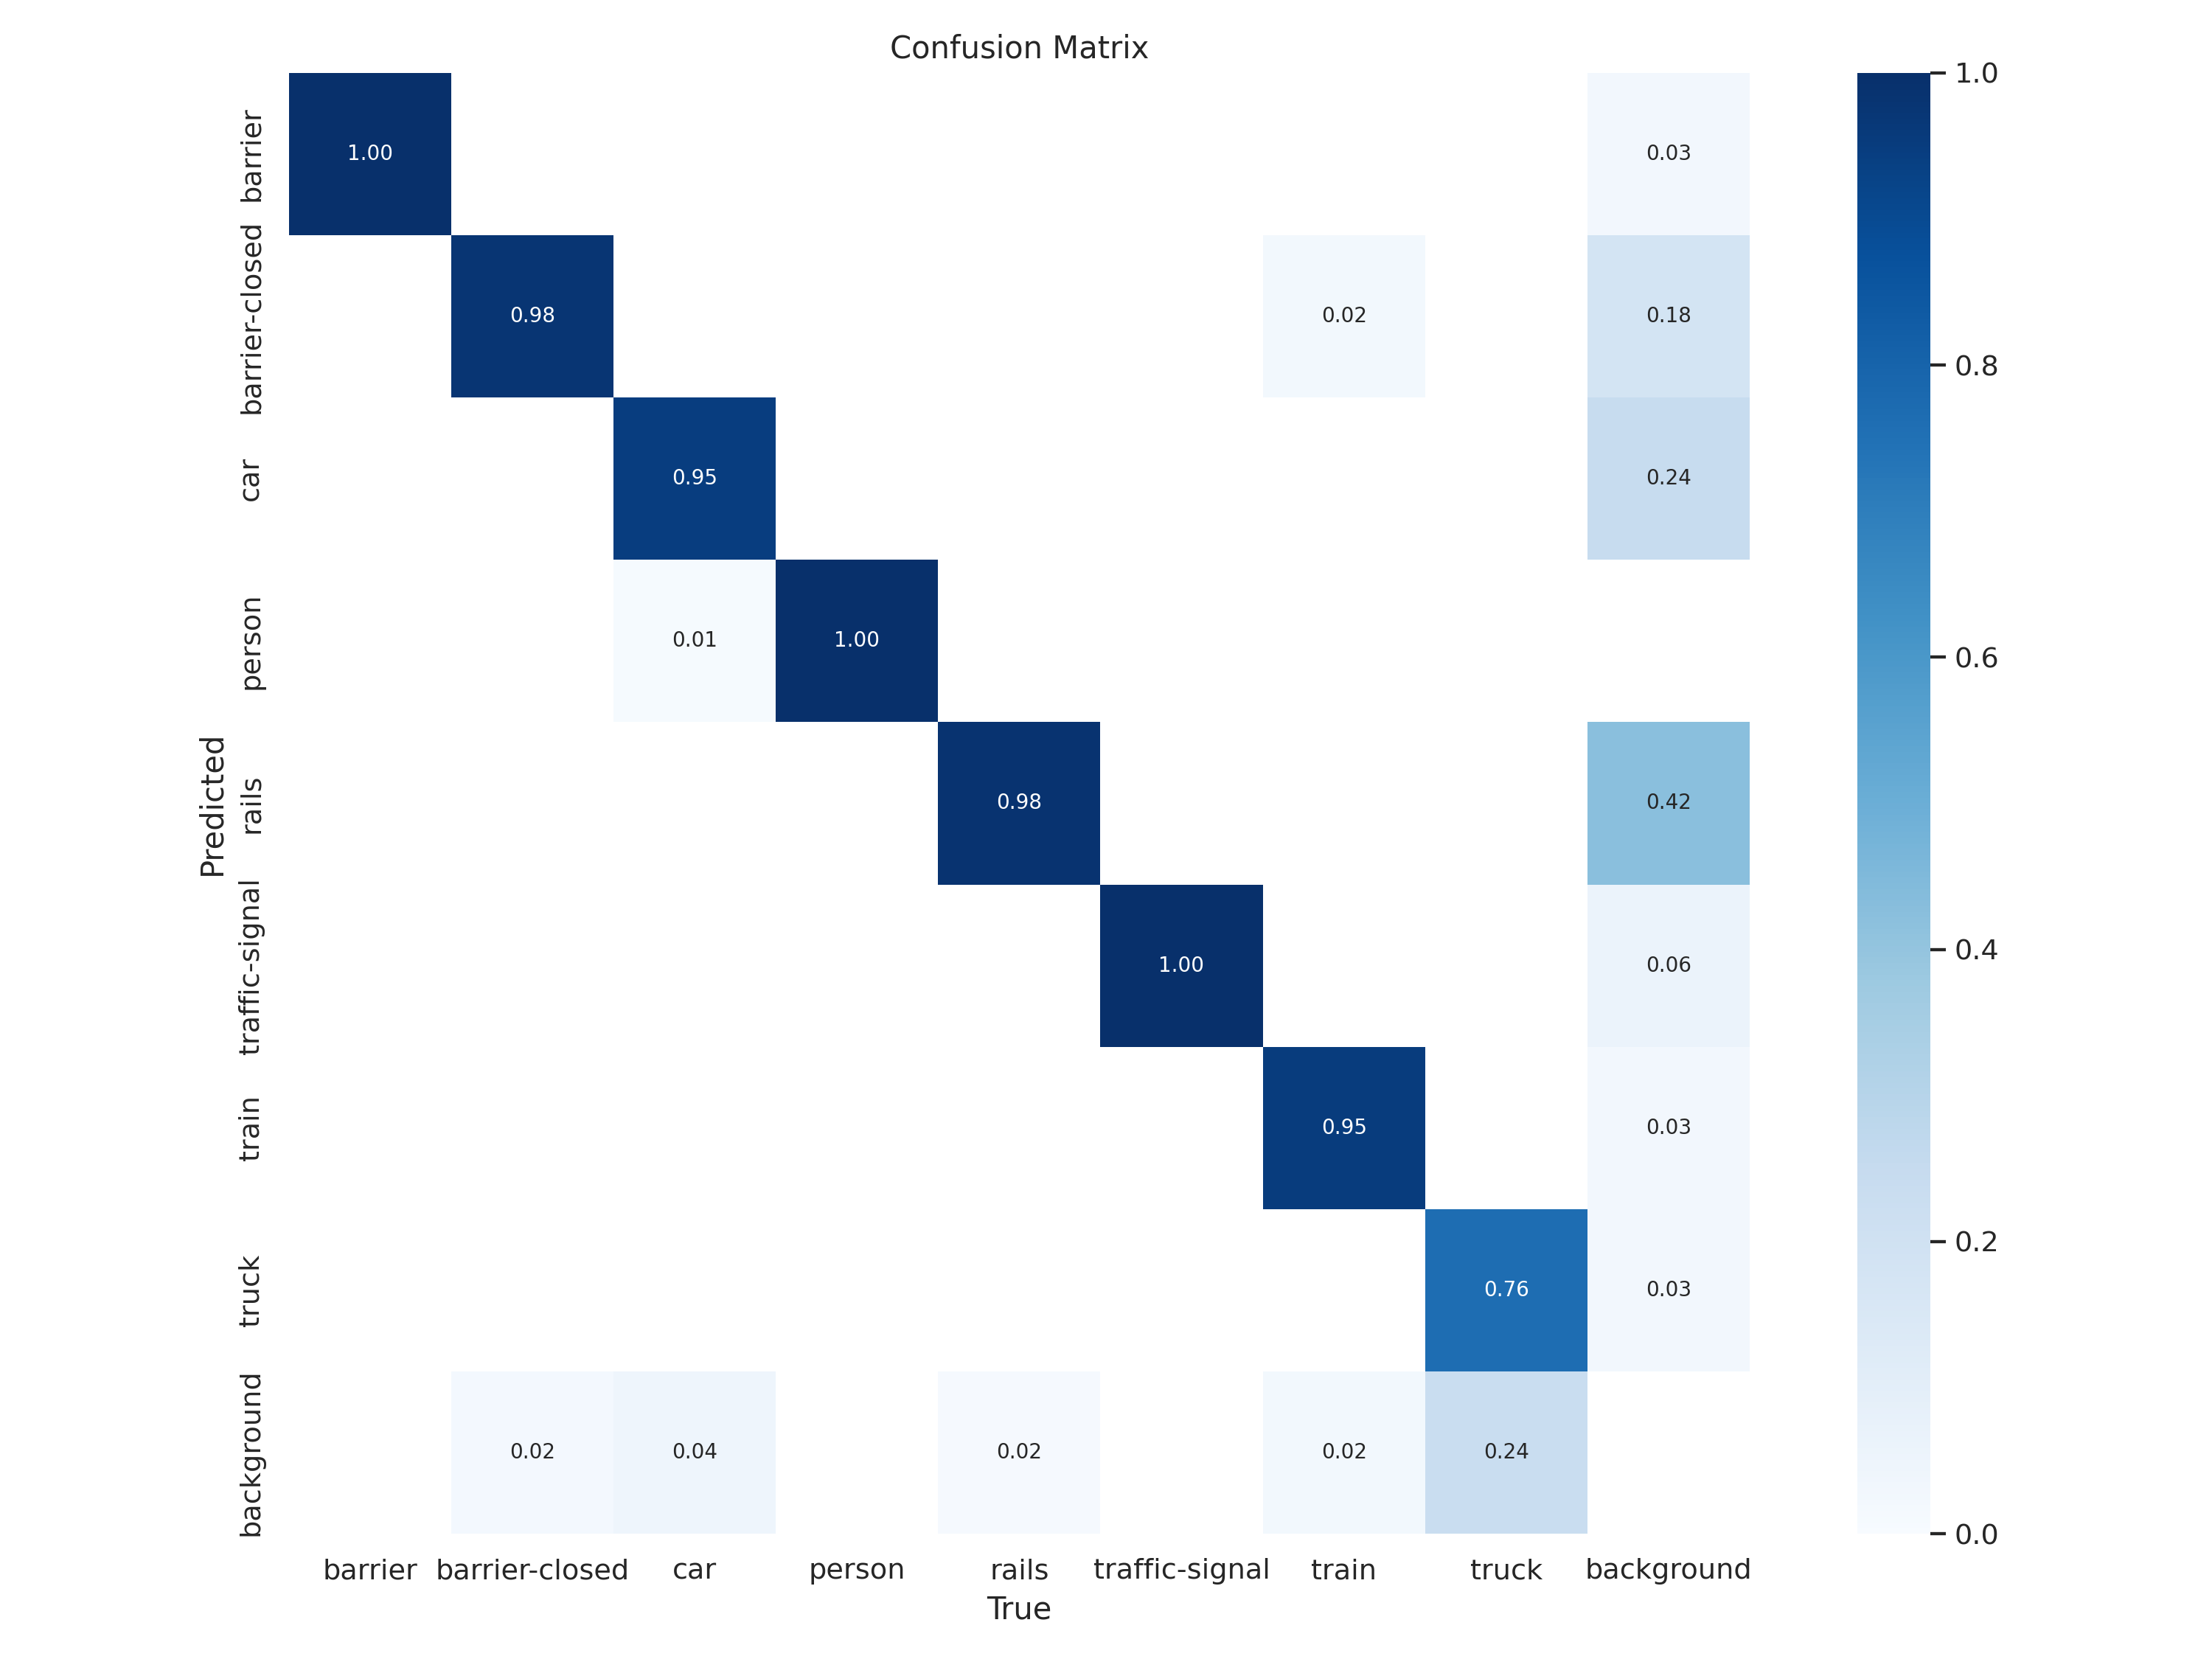

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=800)

/content/drive/MyDrive/ensembling-yolo8/YOLOv8l


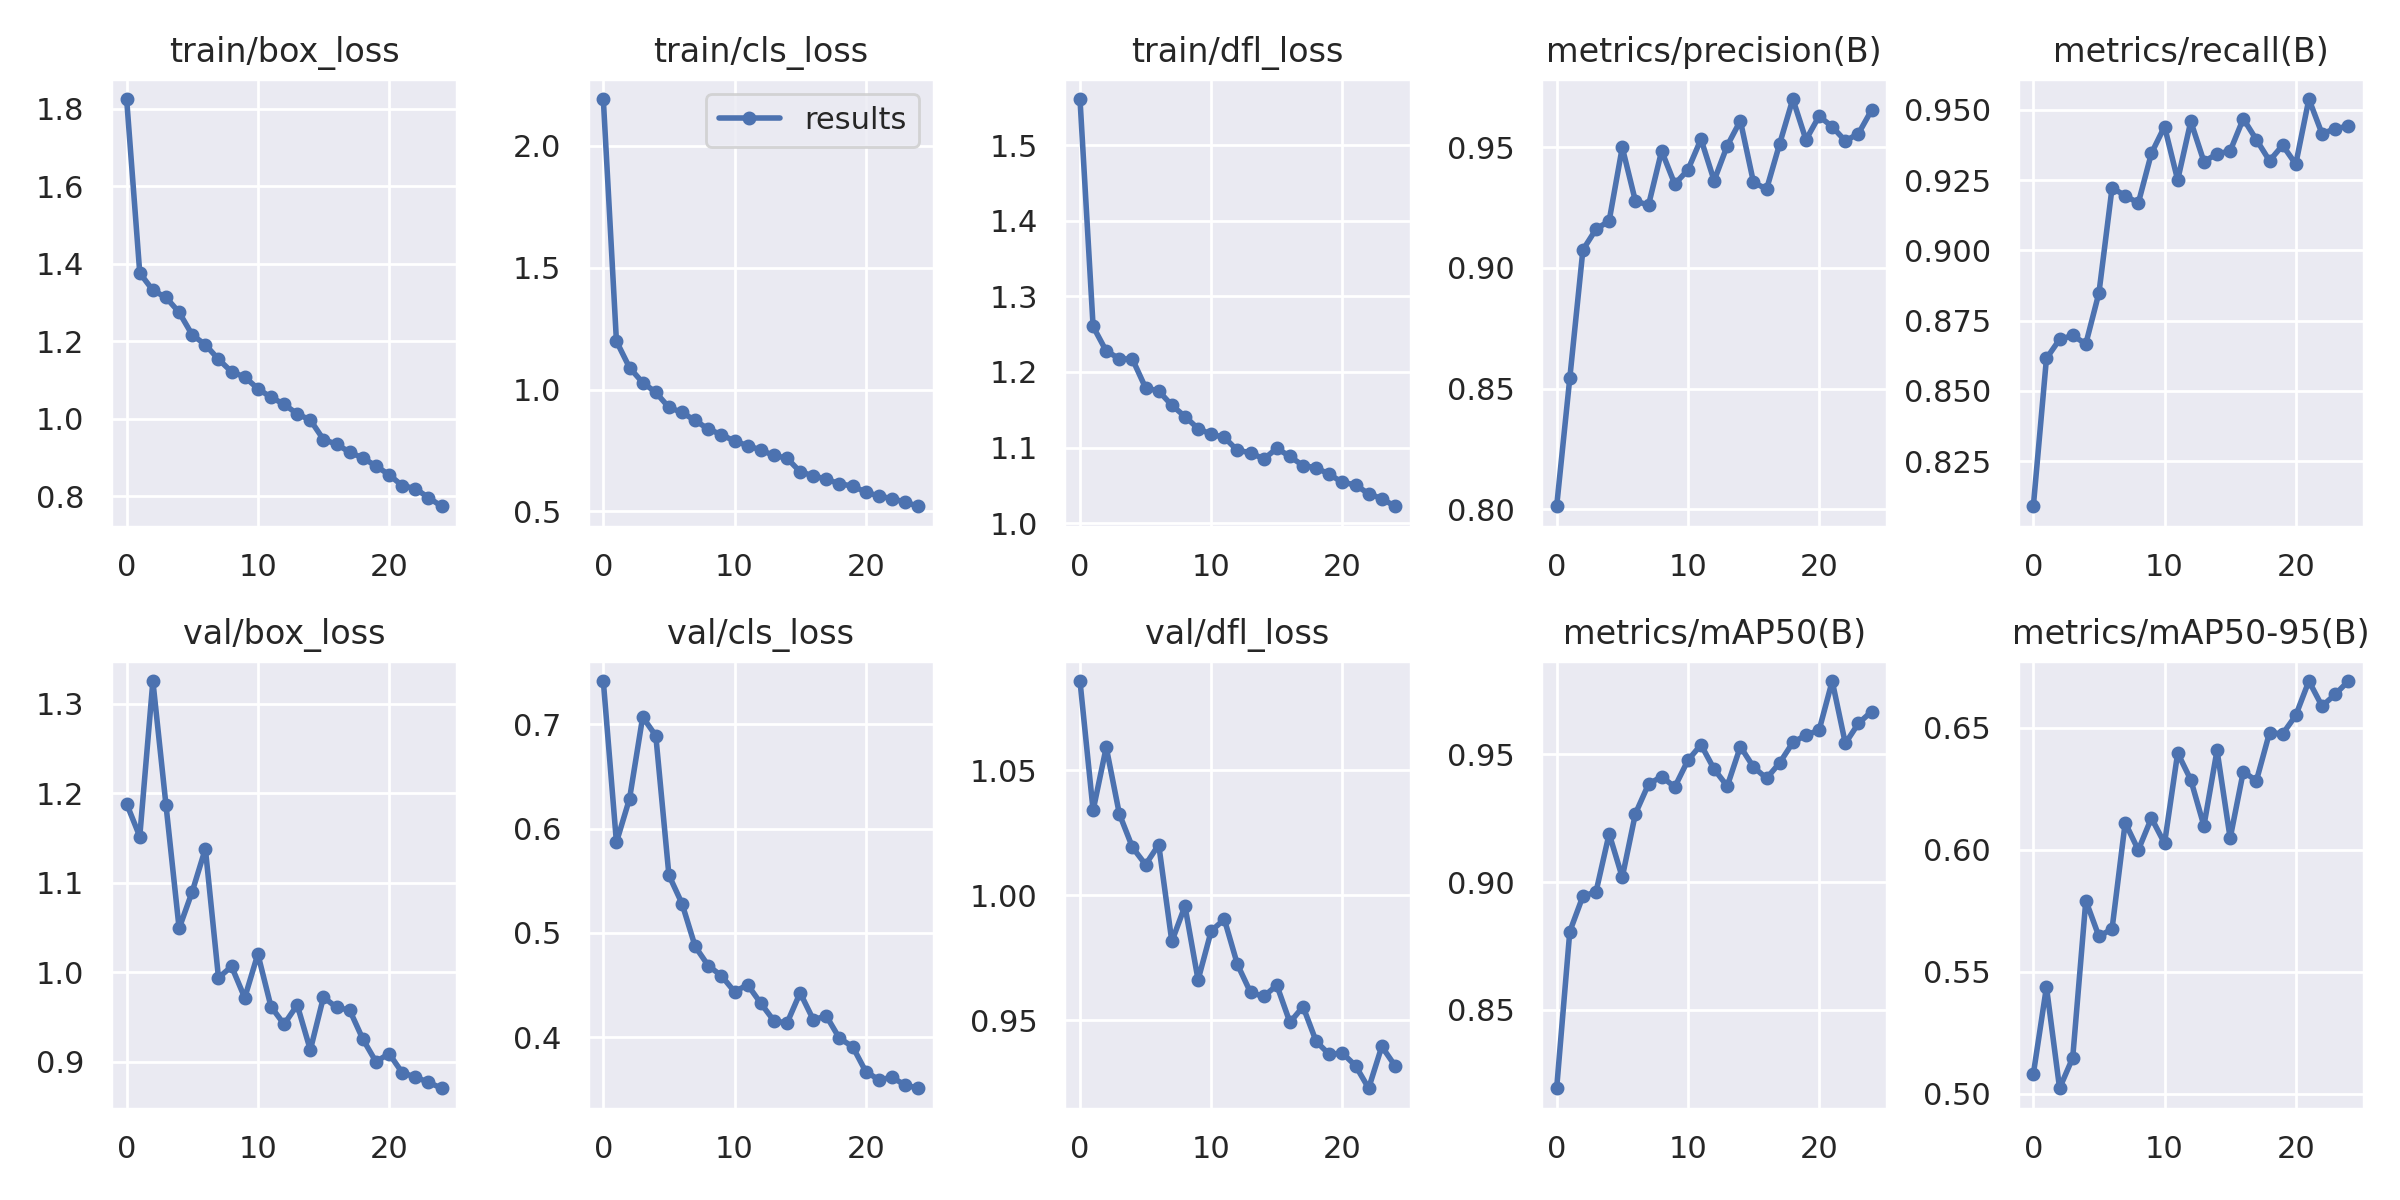

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=800)

/content/drive/MyDrive/ensembling-yolo8/YOLOv8l


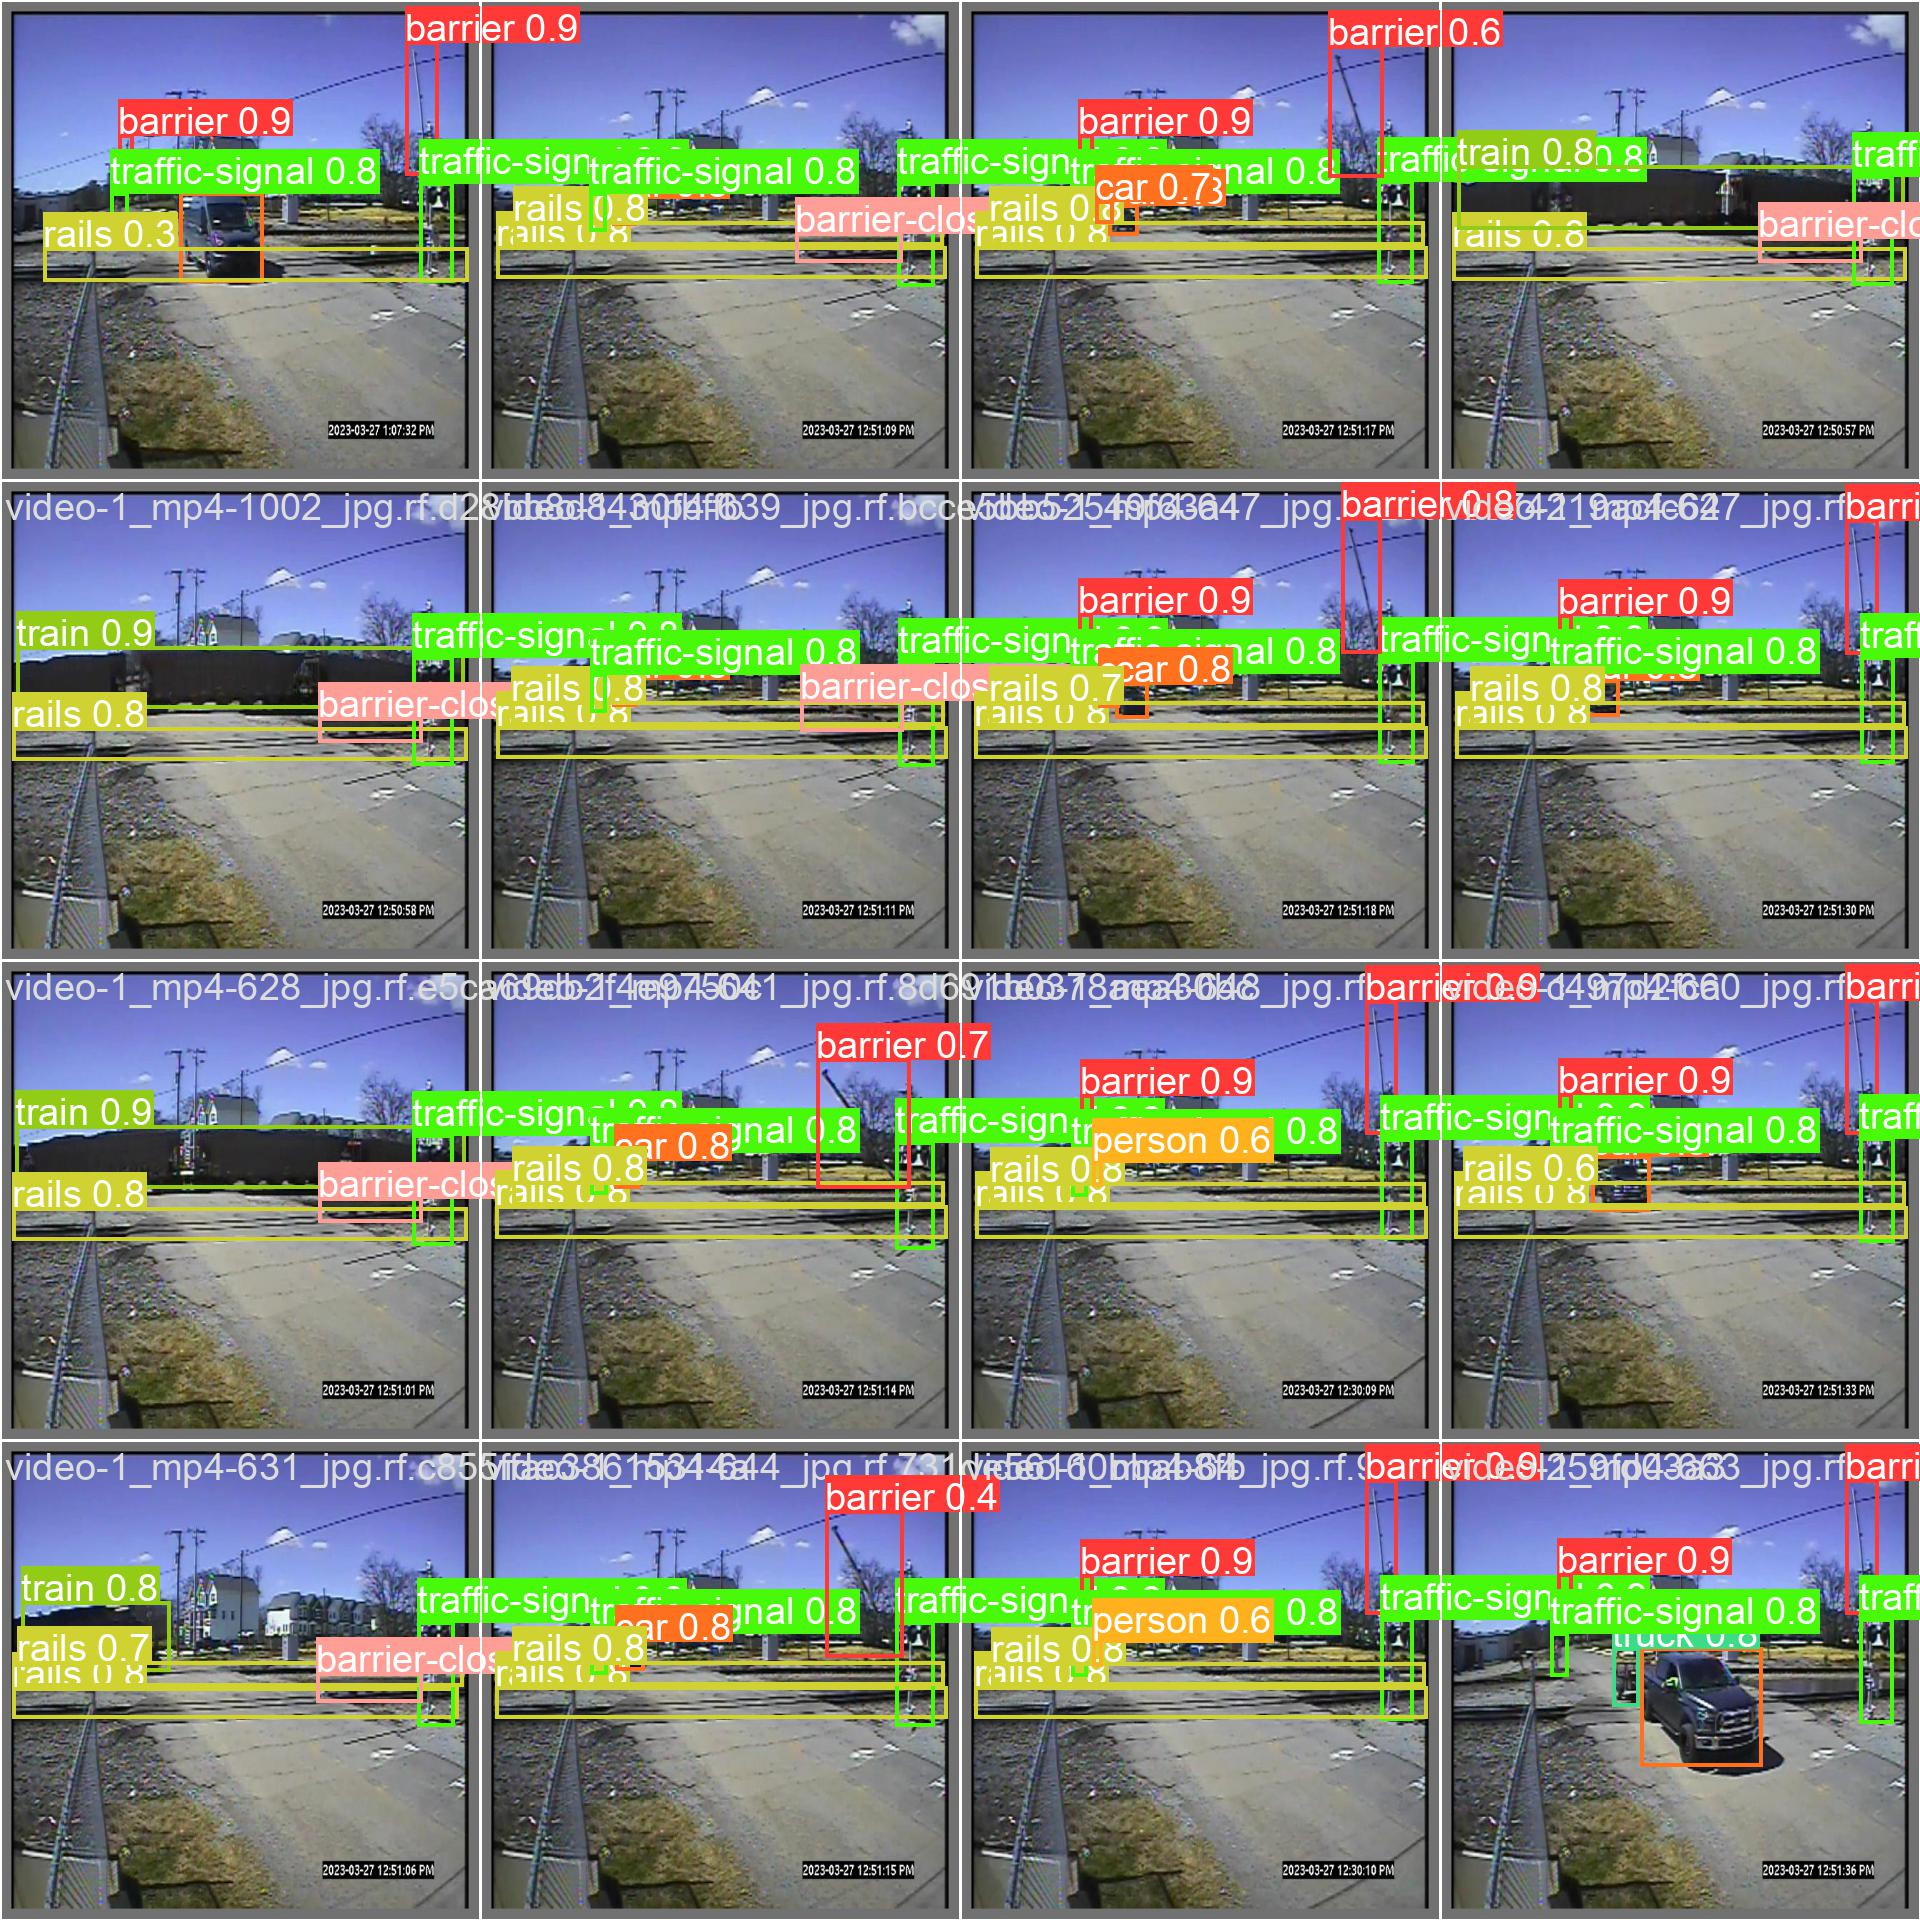

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=800)

/content


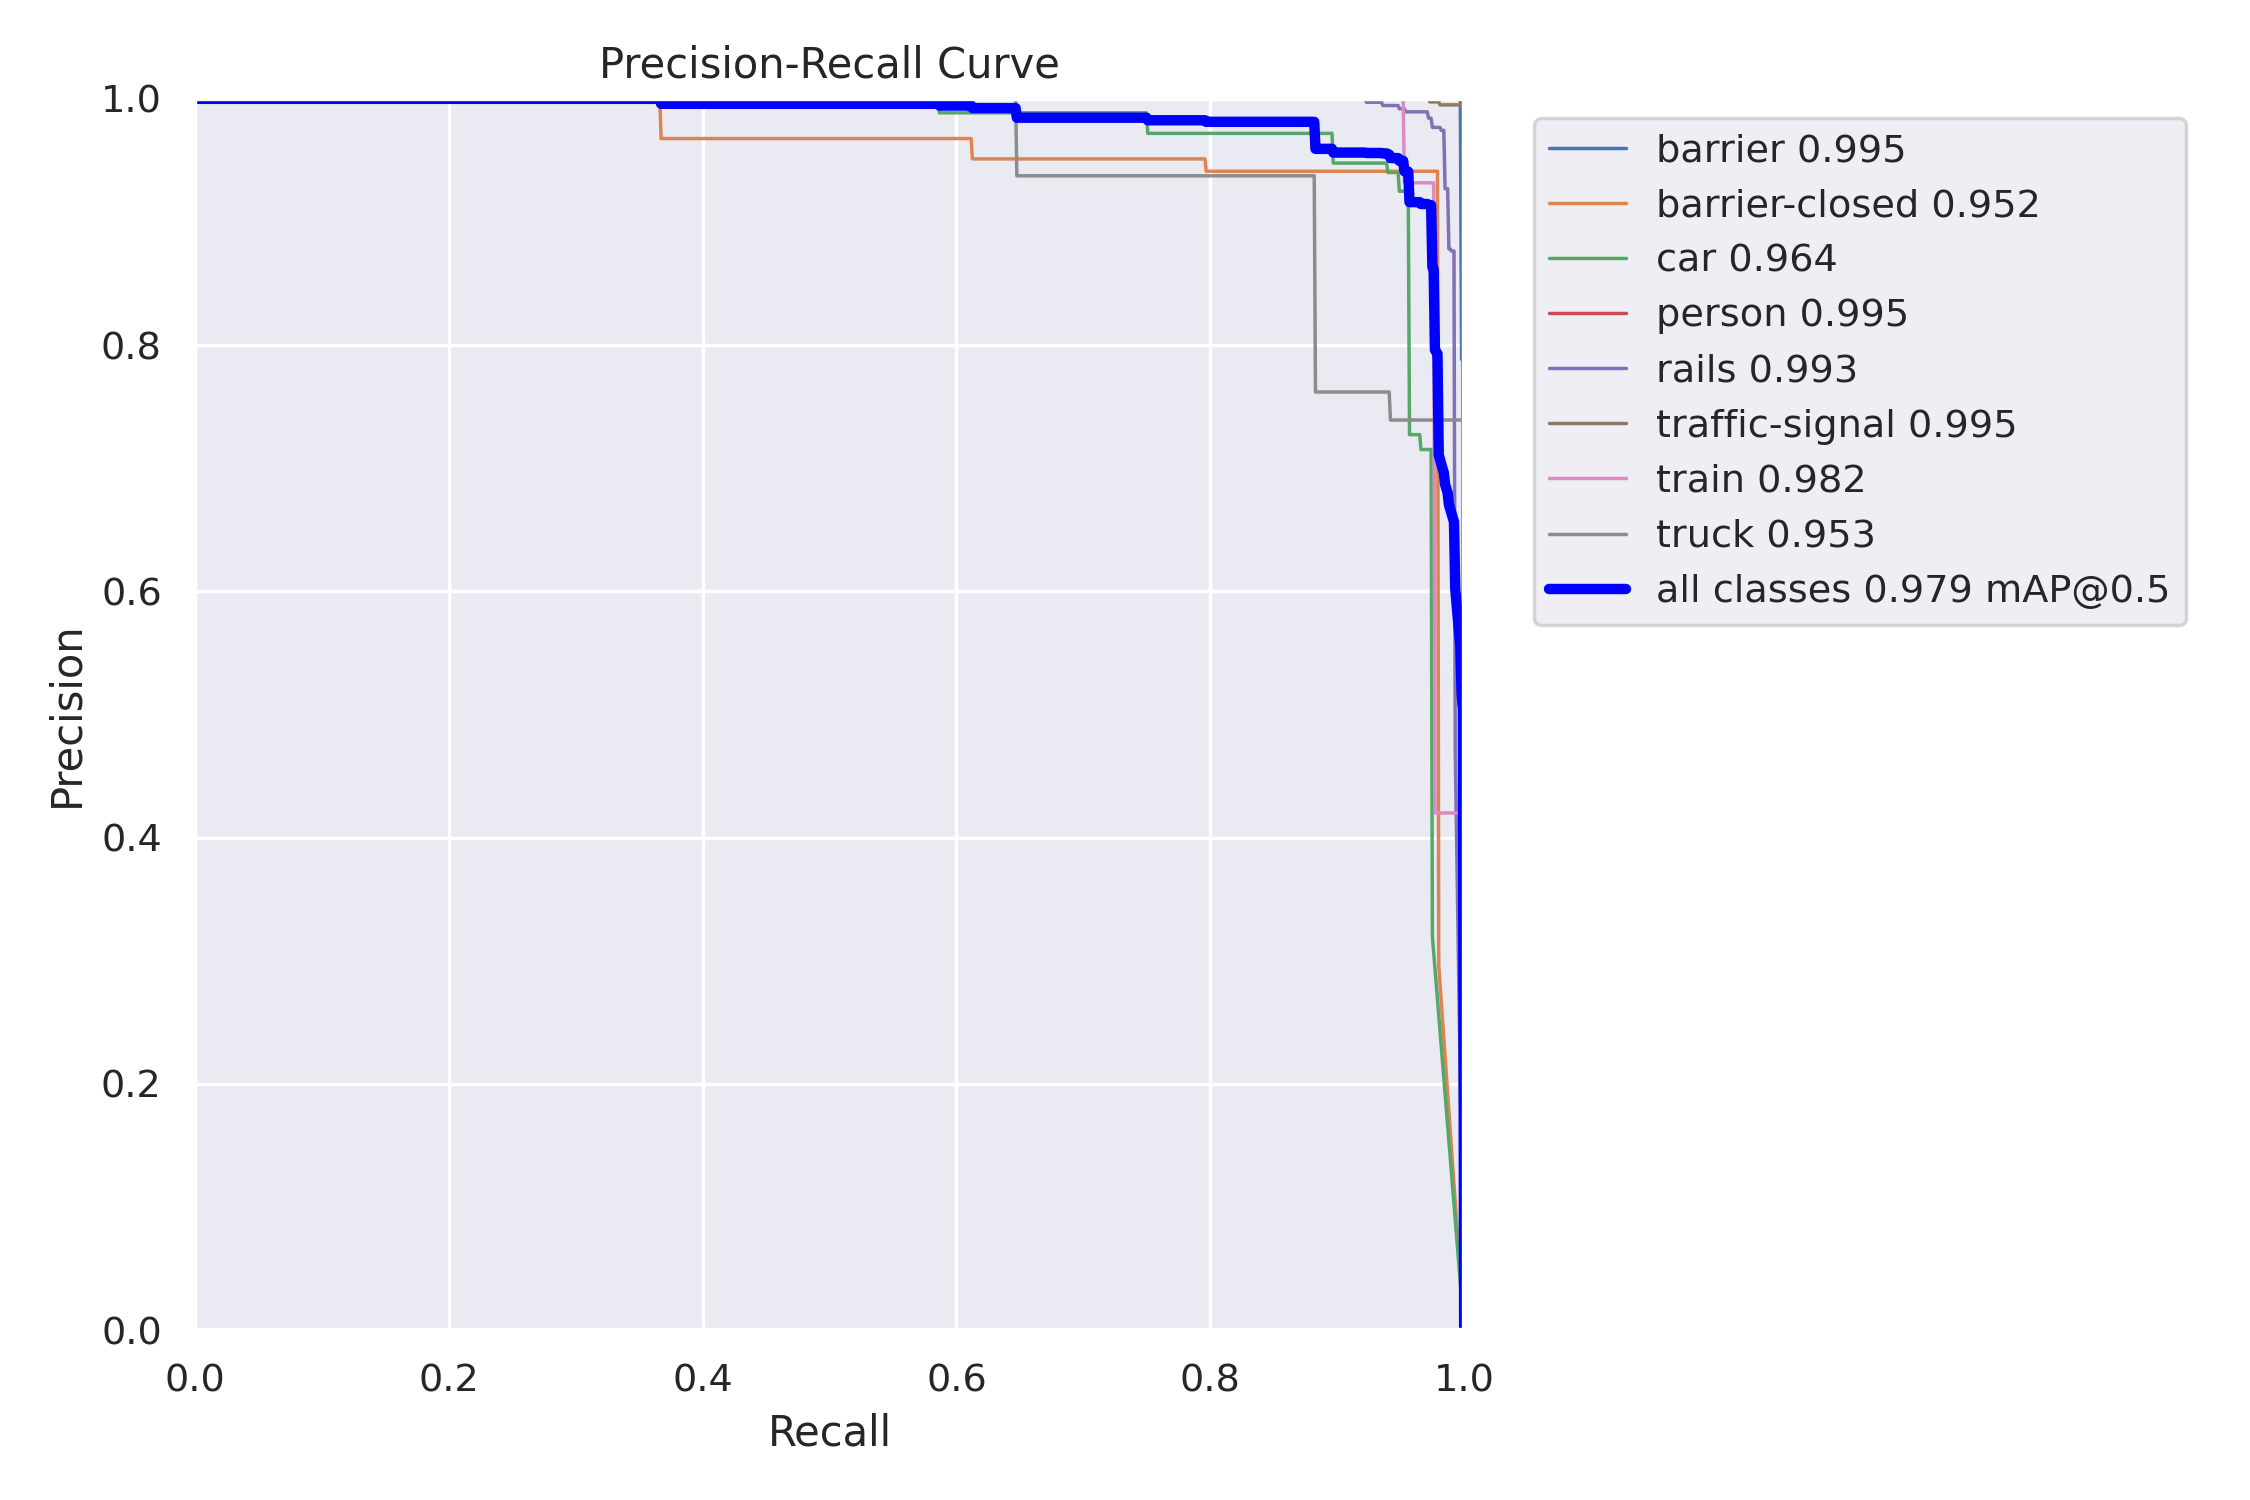

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/PR_curve.png', width=800)

/content


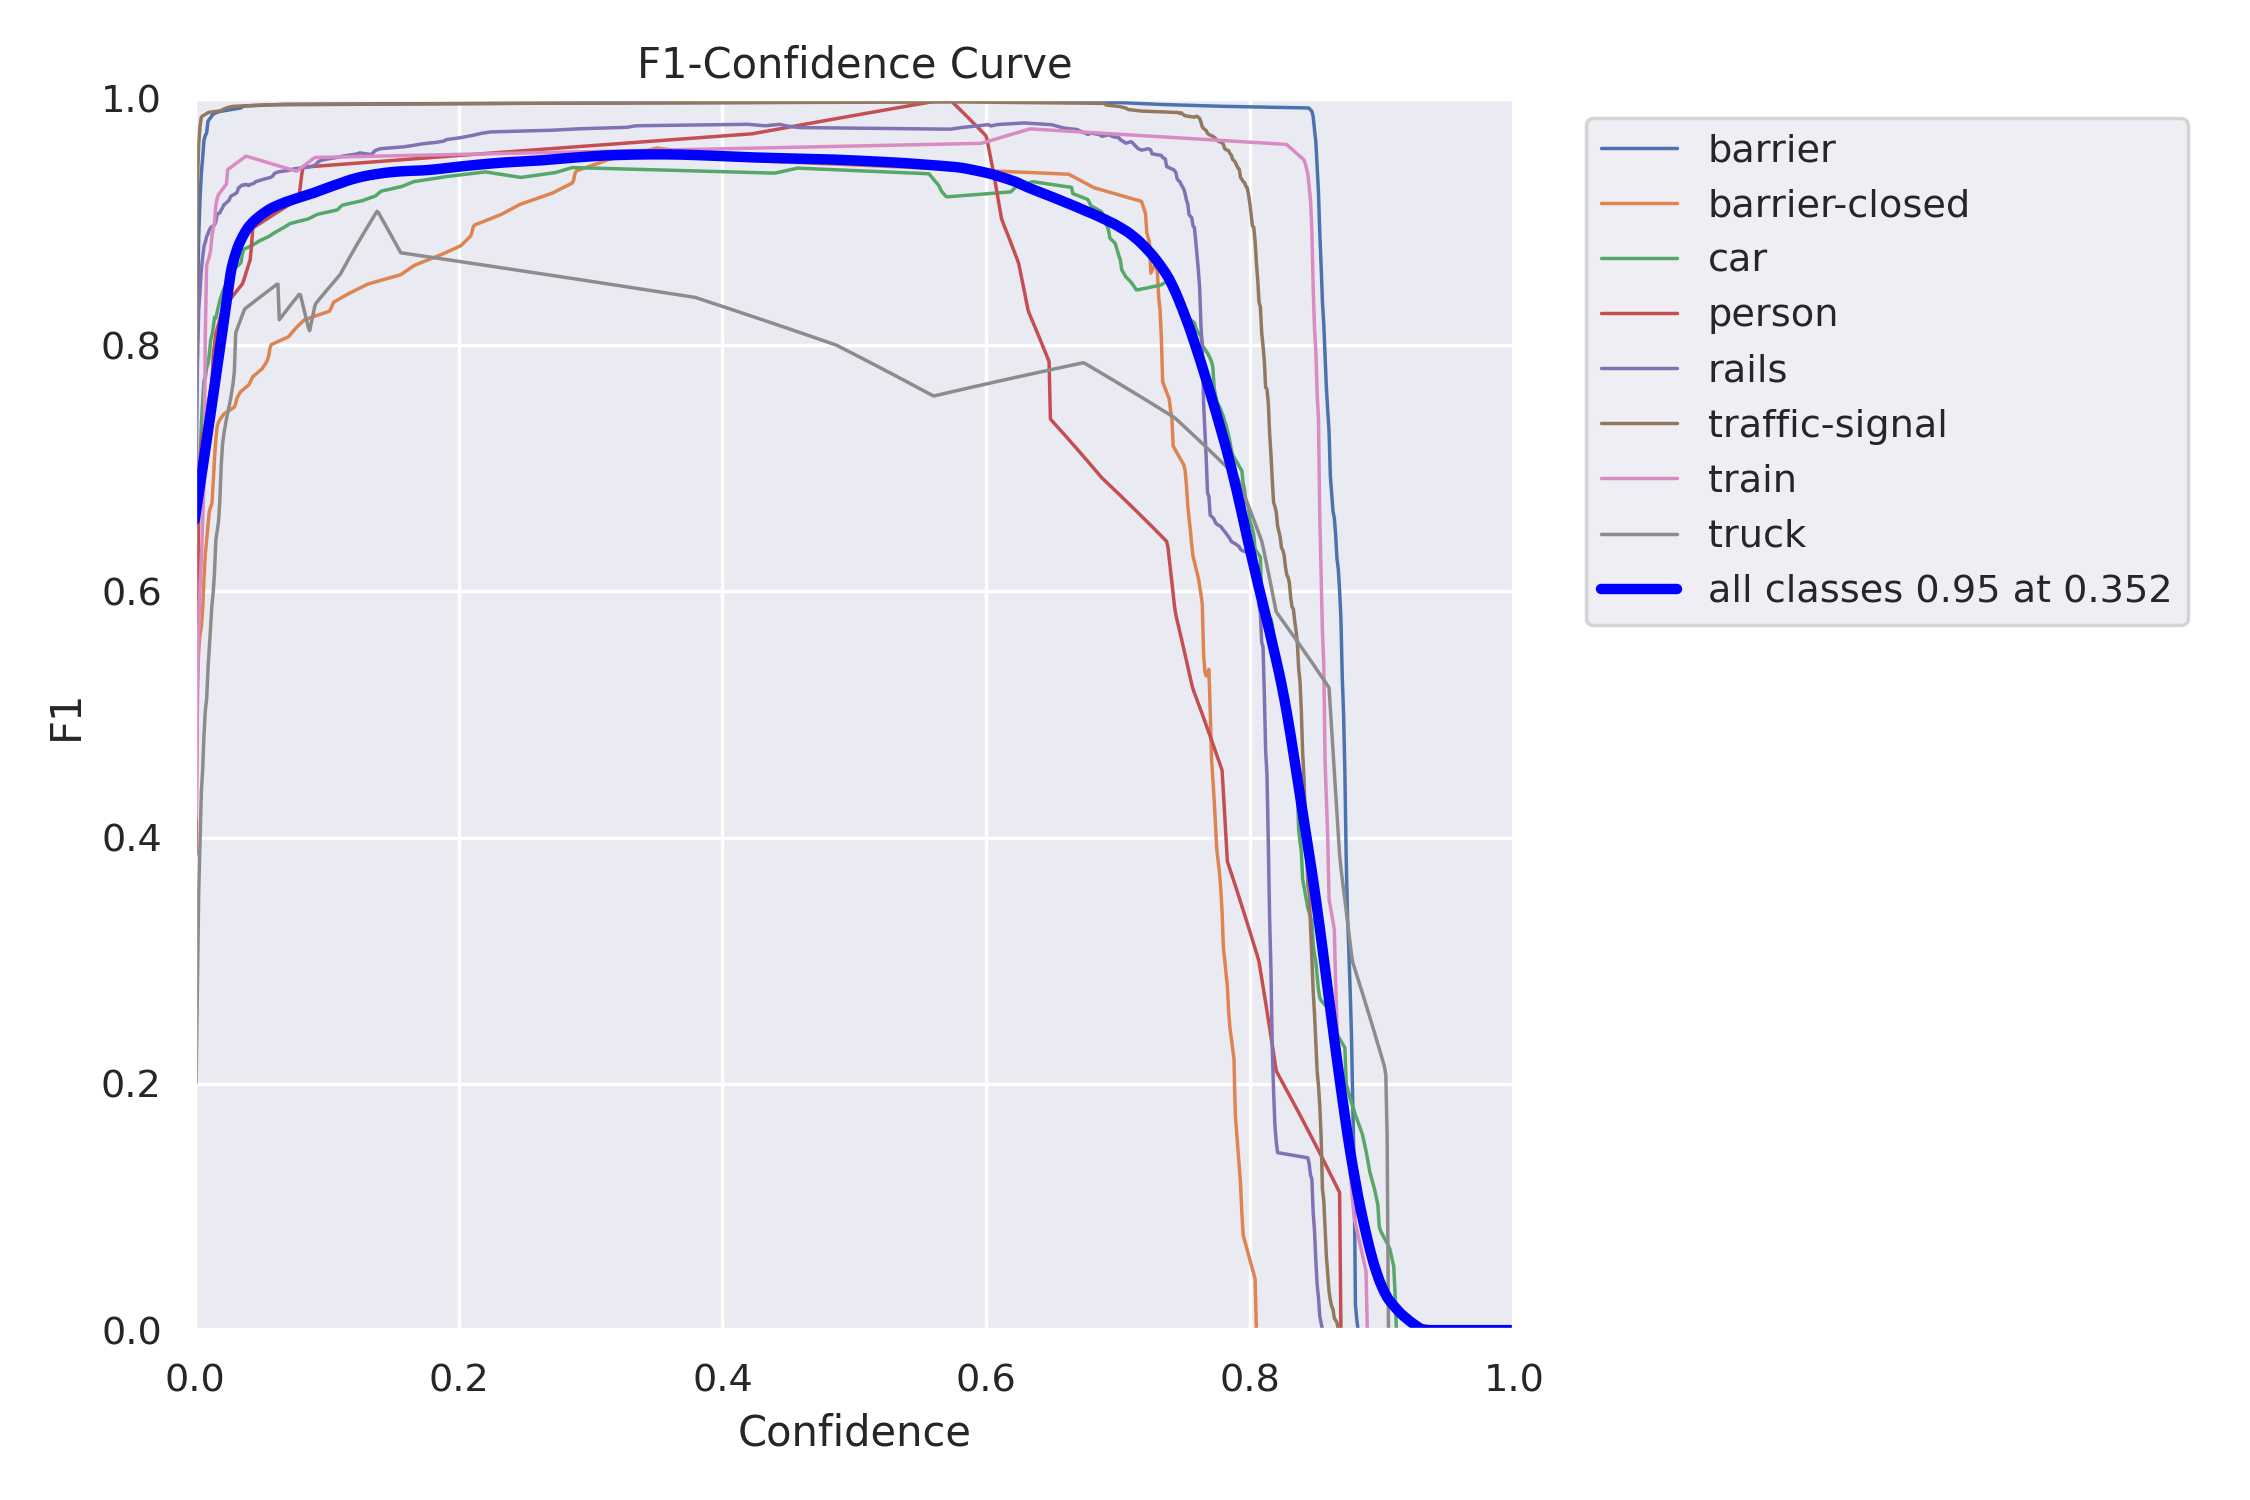

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/F1_curve.png', width=800)

## Validate Custom Model

In [21]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/ensembling-yolo8/YOLOv8l
2023-06-15 14:55:27.602918: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 14:55:28.582525: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43612776 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/drive/MyDrive/ensembling-yolo8/YOLOv8m/datasets/rail-road-crossing-4/valid/labels.cache... 224 images, 0 backgrounds, 0 corrupt: 100% 224/224 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:17<00:00,  1.22s/it]
                   all        224      

## Training Yolov8x

In [15]:
import os
os.chdir("/content/drive/MyDrive/ensembling-yolo8/YOLOv8x")

directory_path = "/content/drive/MyDrive/ensembling-yolo8/YOLOv8x"

In [16]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/ensembling-yolo8/YOLOv8x


In [24]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="1y2suOpZcCBrV3qiK5SN")
project = rf.workspace("al-amin").project("rail-road-crossing")
dataset = project.version(4).download("yolov8")


/content/drive/MyDrive/ensembling-yolo8/YOLOv8x/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to rail-road-crossing-4 in yolov8:: 100%|██████████| 5382/5382 [00:35<00:00, 151.05it/s]


In [25]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content/drive/MyDrive/ensembling-yolo8/YOLOv8x
100% 131M/131M [00:00<00:00, 144MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/drive/MyDrive/ensembling-yolo8/YOLOv8x/datasets/rail-road-crossing-4/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms

In [26]:
!ls {HOME}/runs/detect/train/

args.yaml					     train_batch2205.jpg
confusion_matrix.png				     train_batch2206.jpg
events.out.tfevents.1686841109.480dcf3167b5.23669.0  train_batch2207.jpg
F1_curve.png					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg
PR_curve.png					     val_batch0_pred.jpg
R_curve.png					     val_batch1_labels.jpg
results.csv					     val_batch1_pred.jpg
results.png					     val_batch2_labels.jpg
train_batch0.jpg				     val_batch2_pred.jpg
train_batch1.jpg				     weights


/content/drive/MyDrive/ensembling-yolo8/YOLOv8x


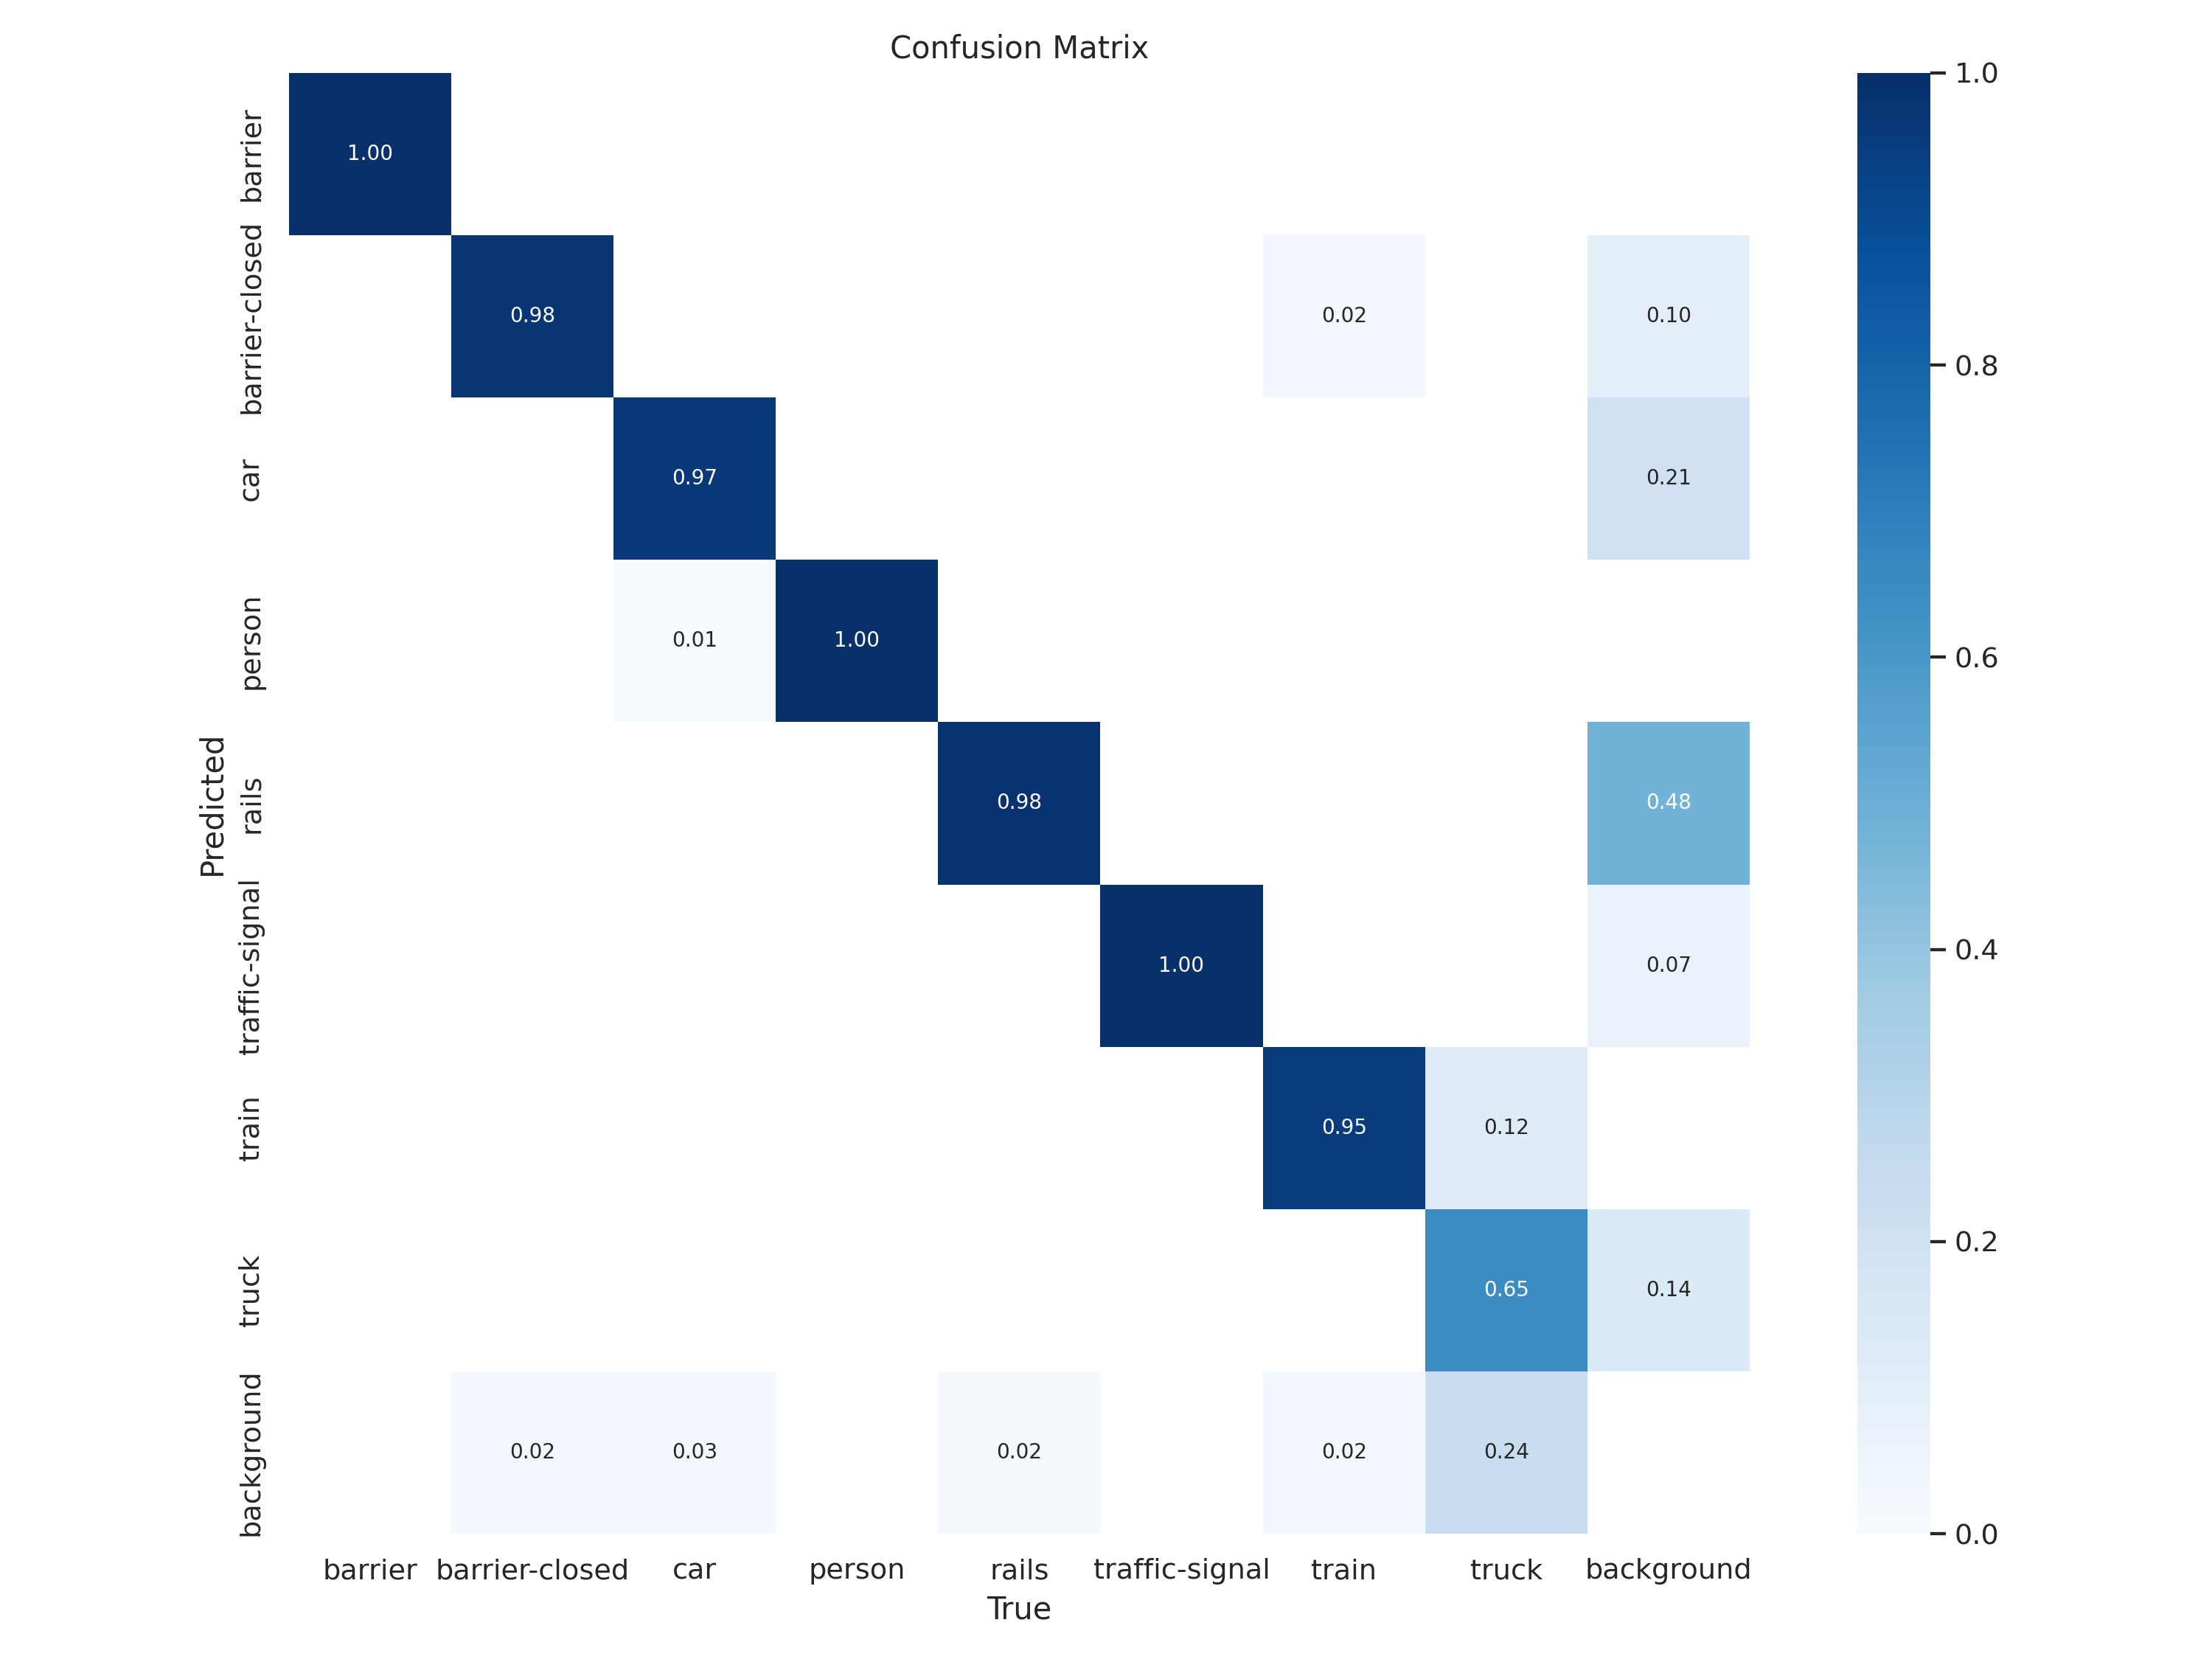

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

/content/drive/MyDrive/ensembling-yolo8/YOLOv8x


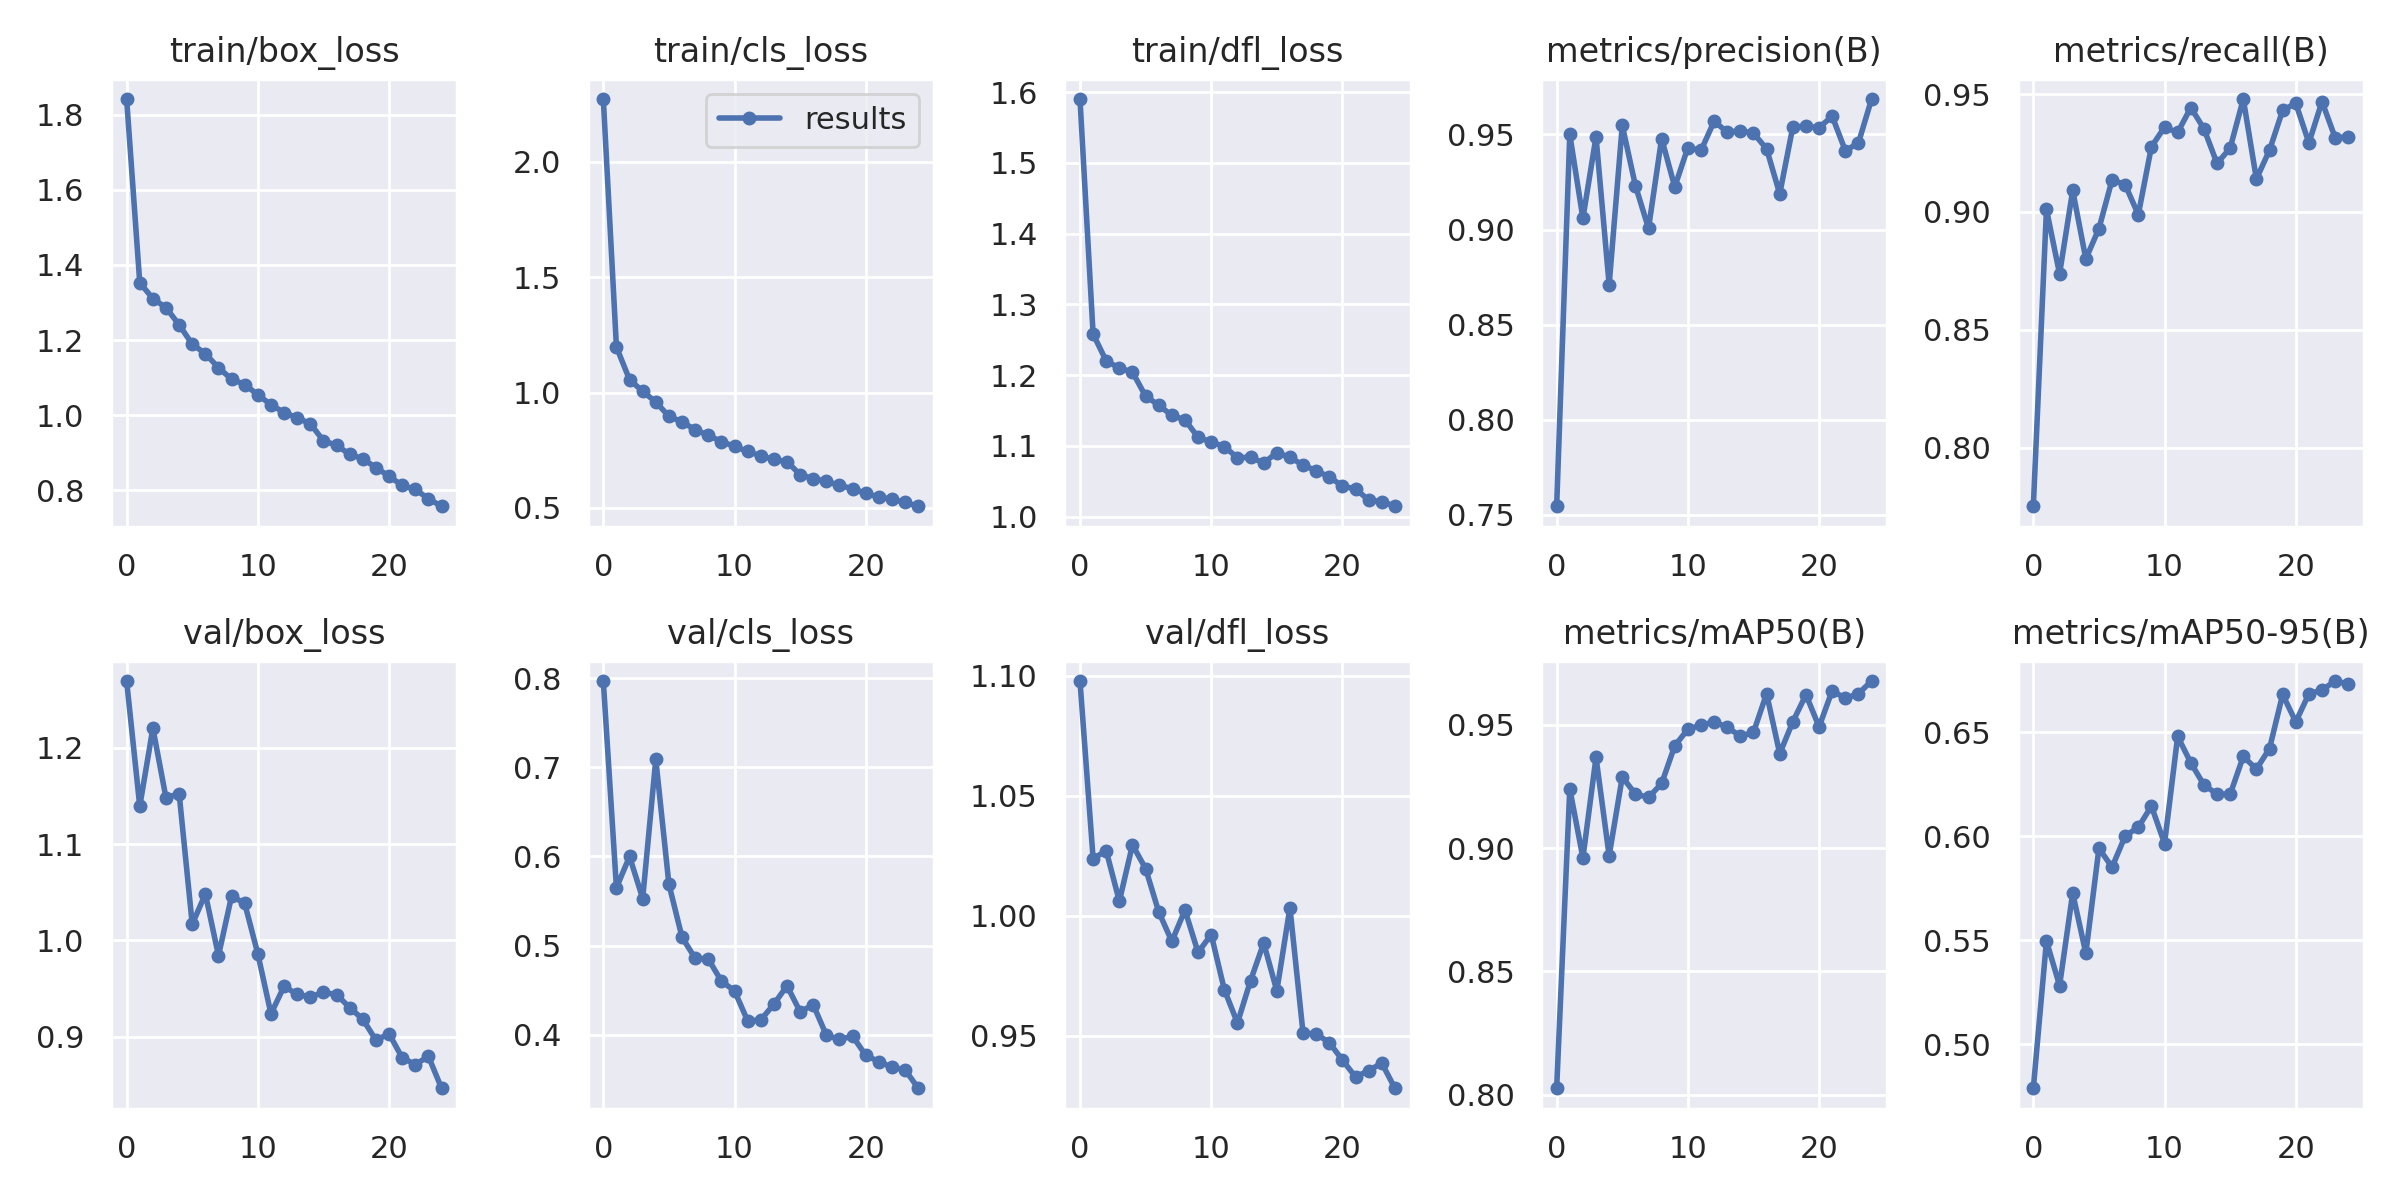

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/content


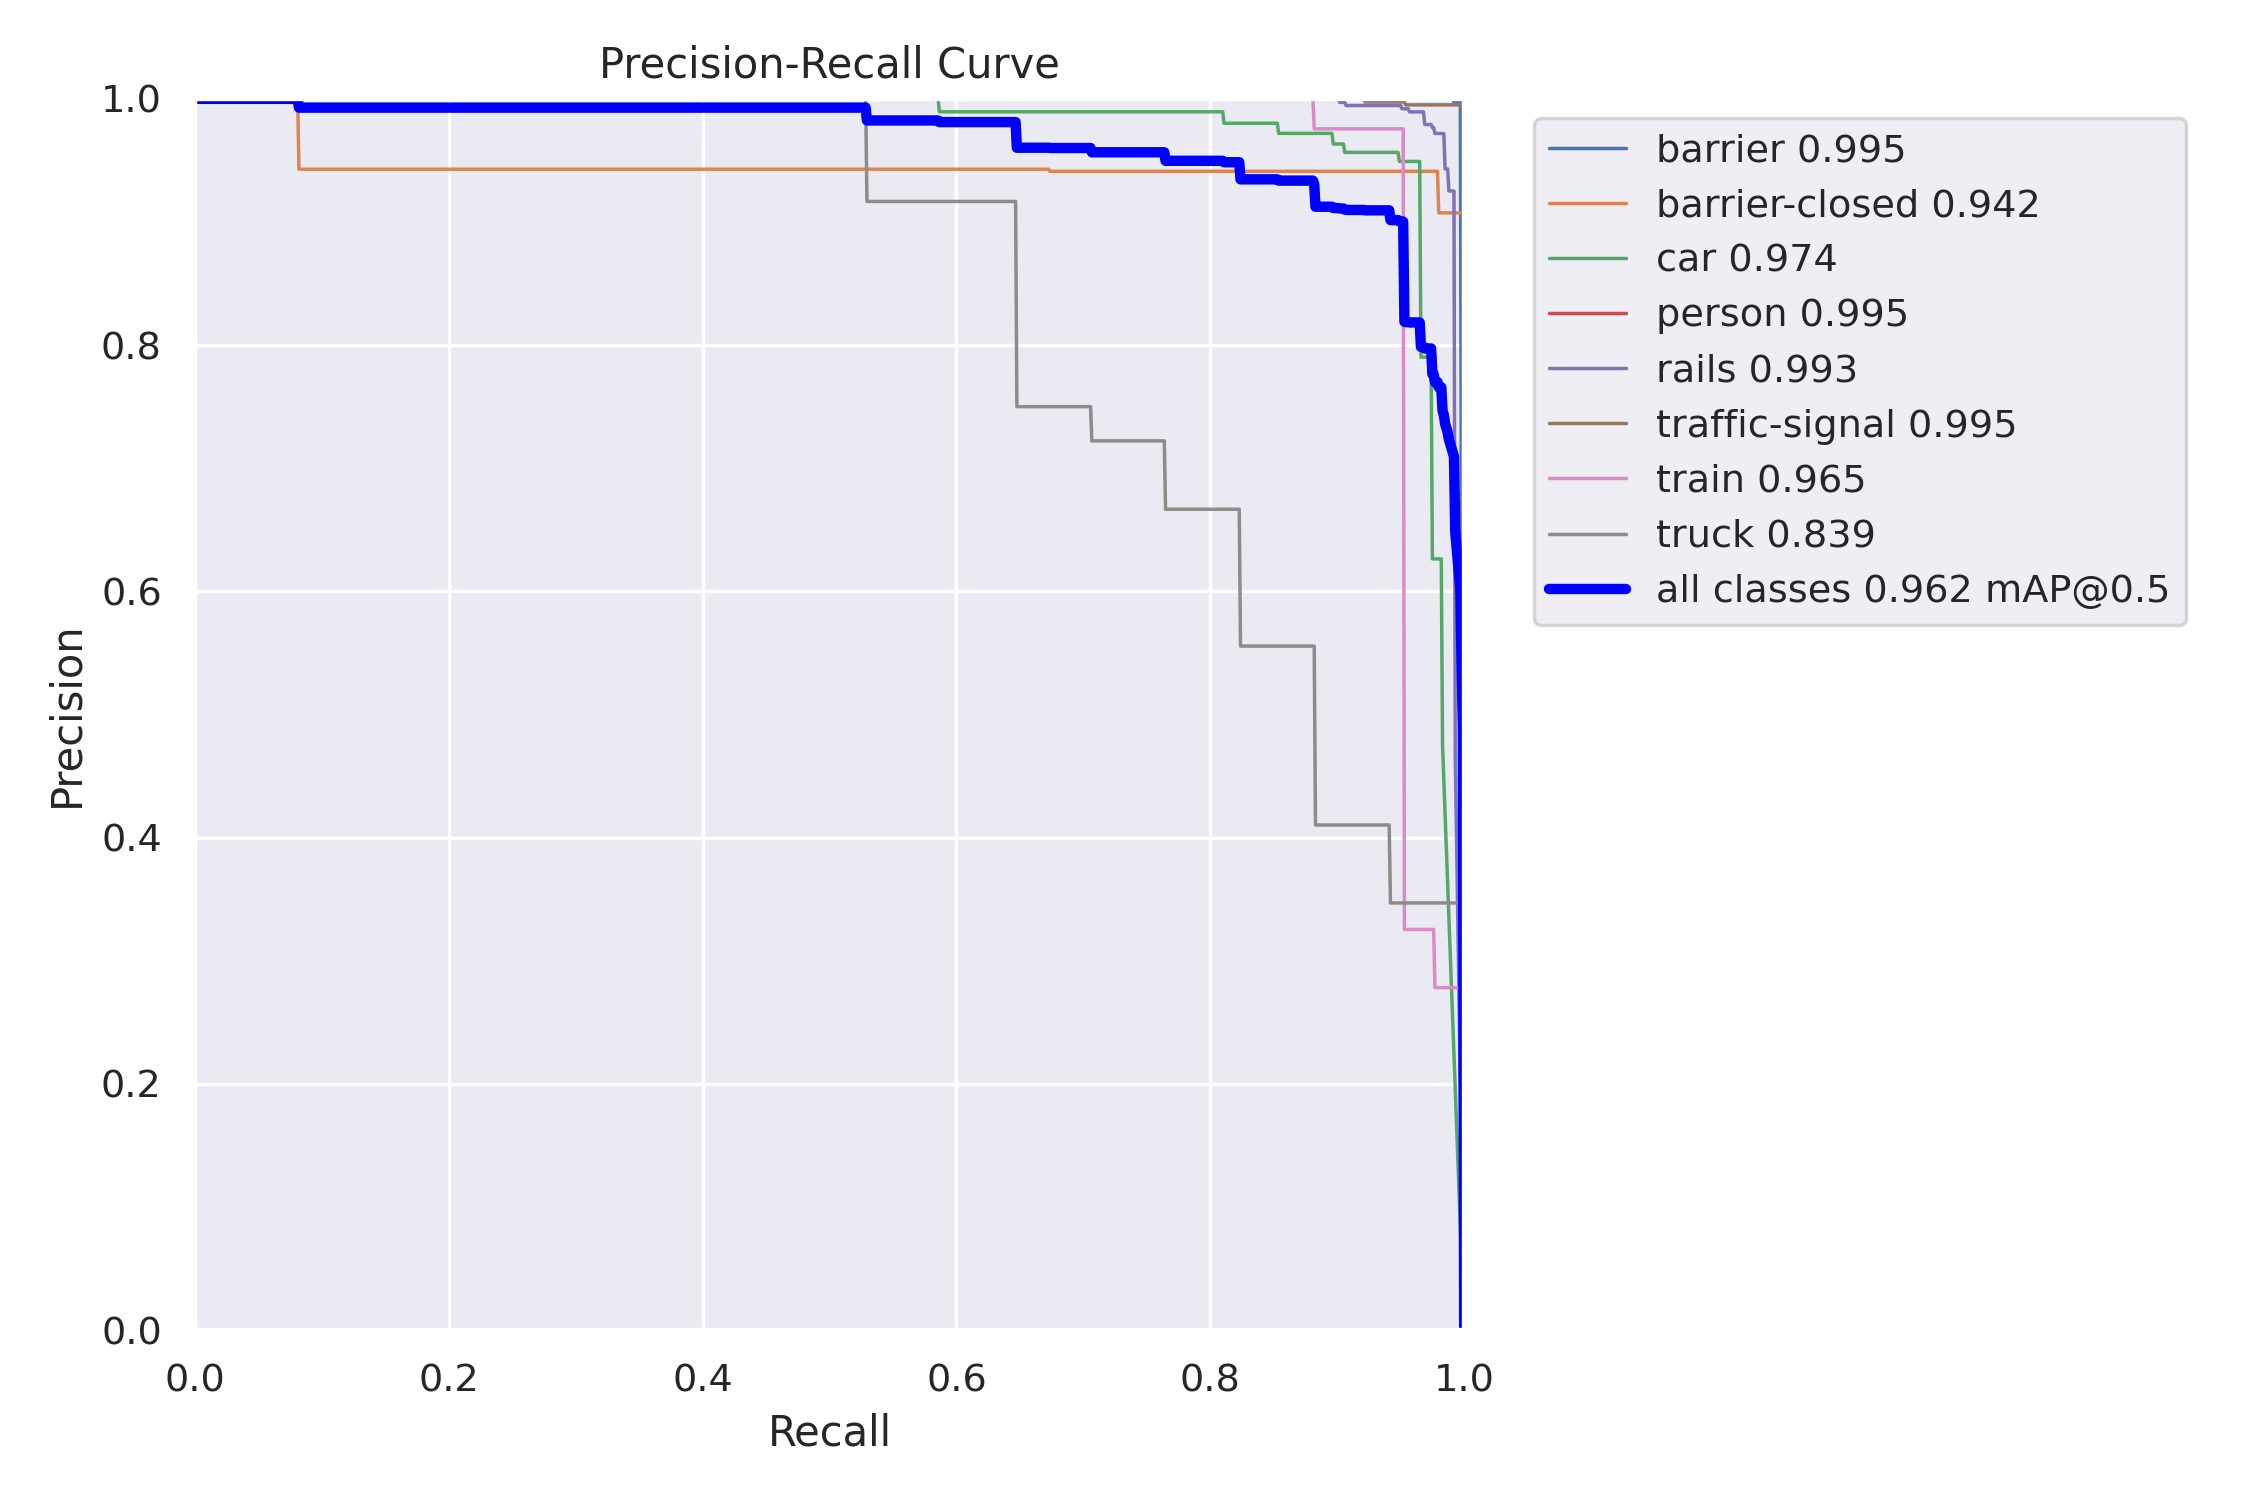

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=800)

/content


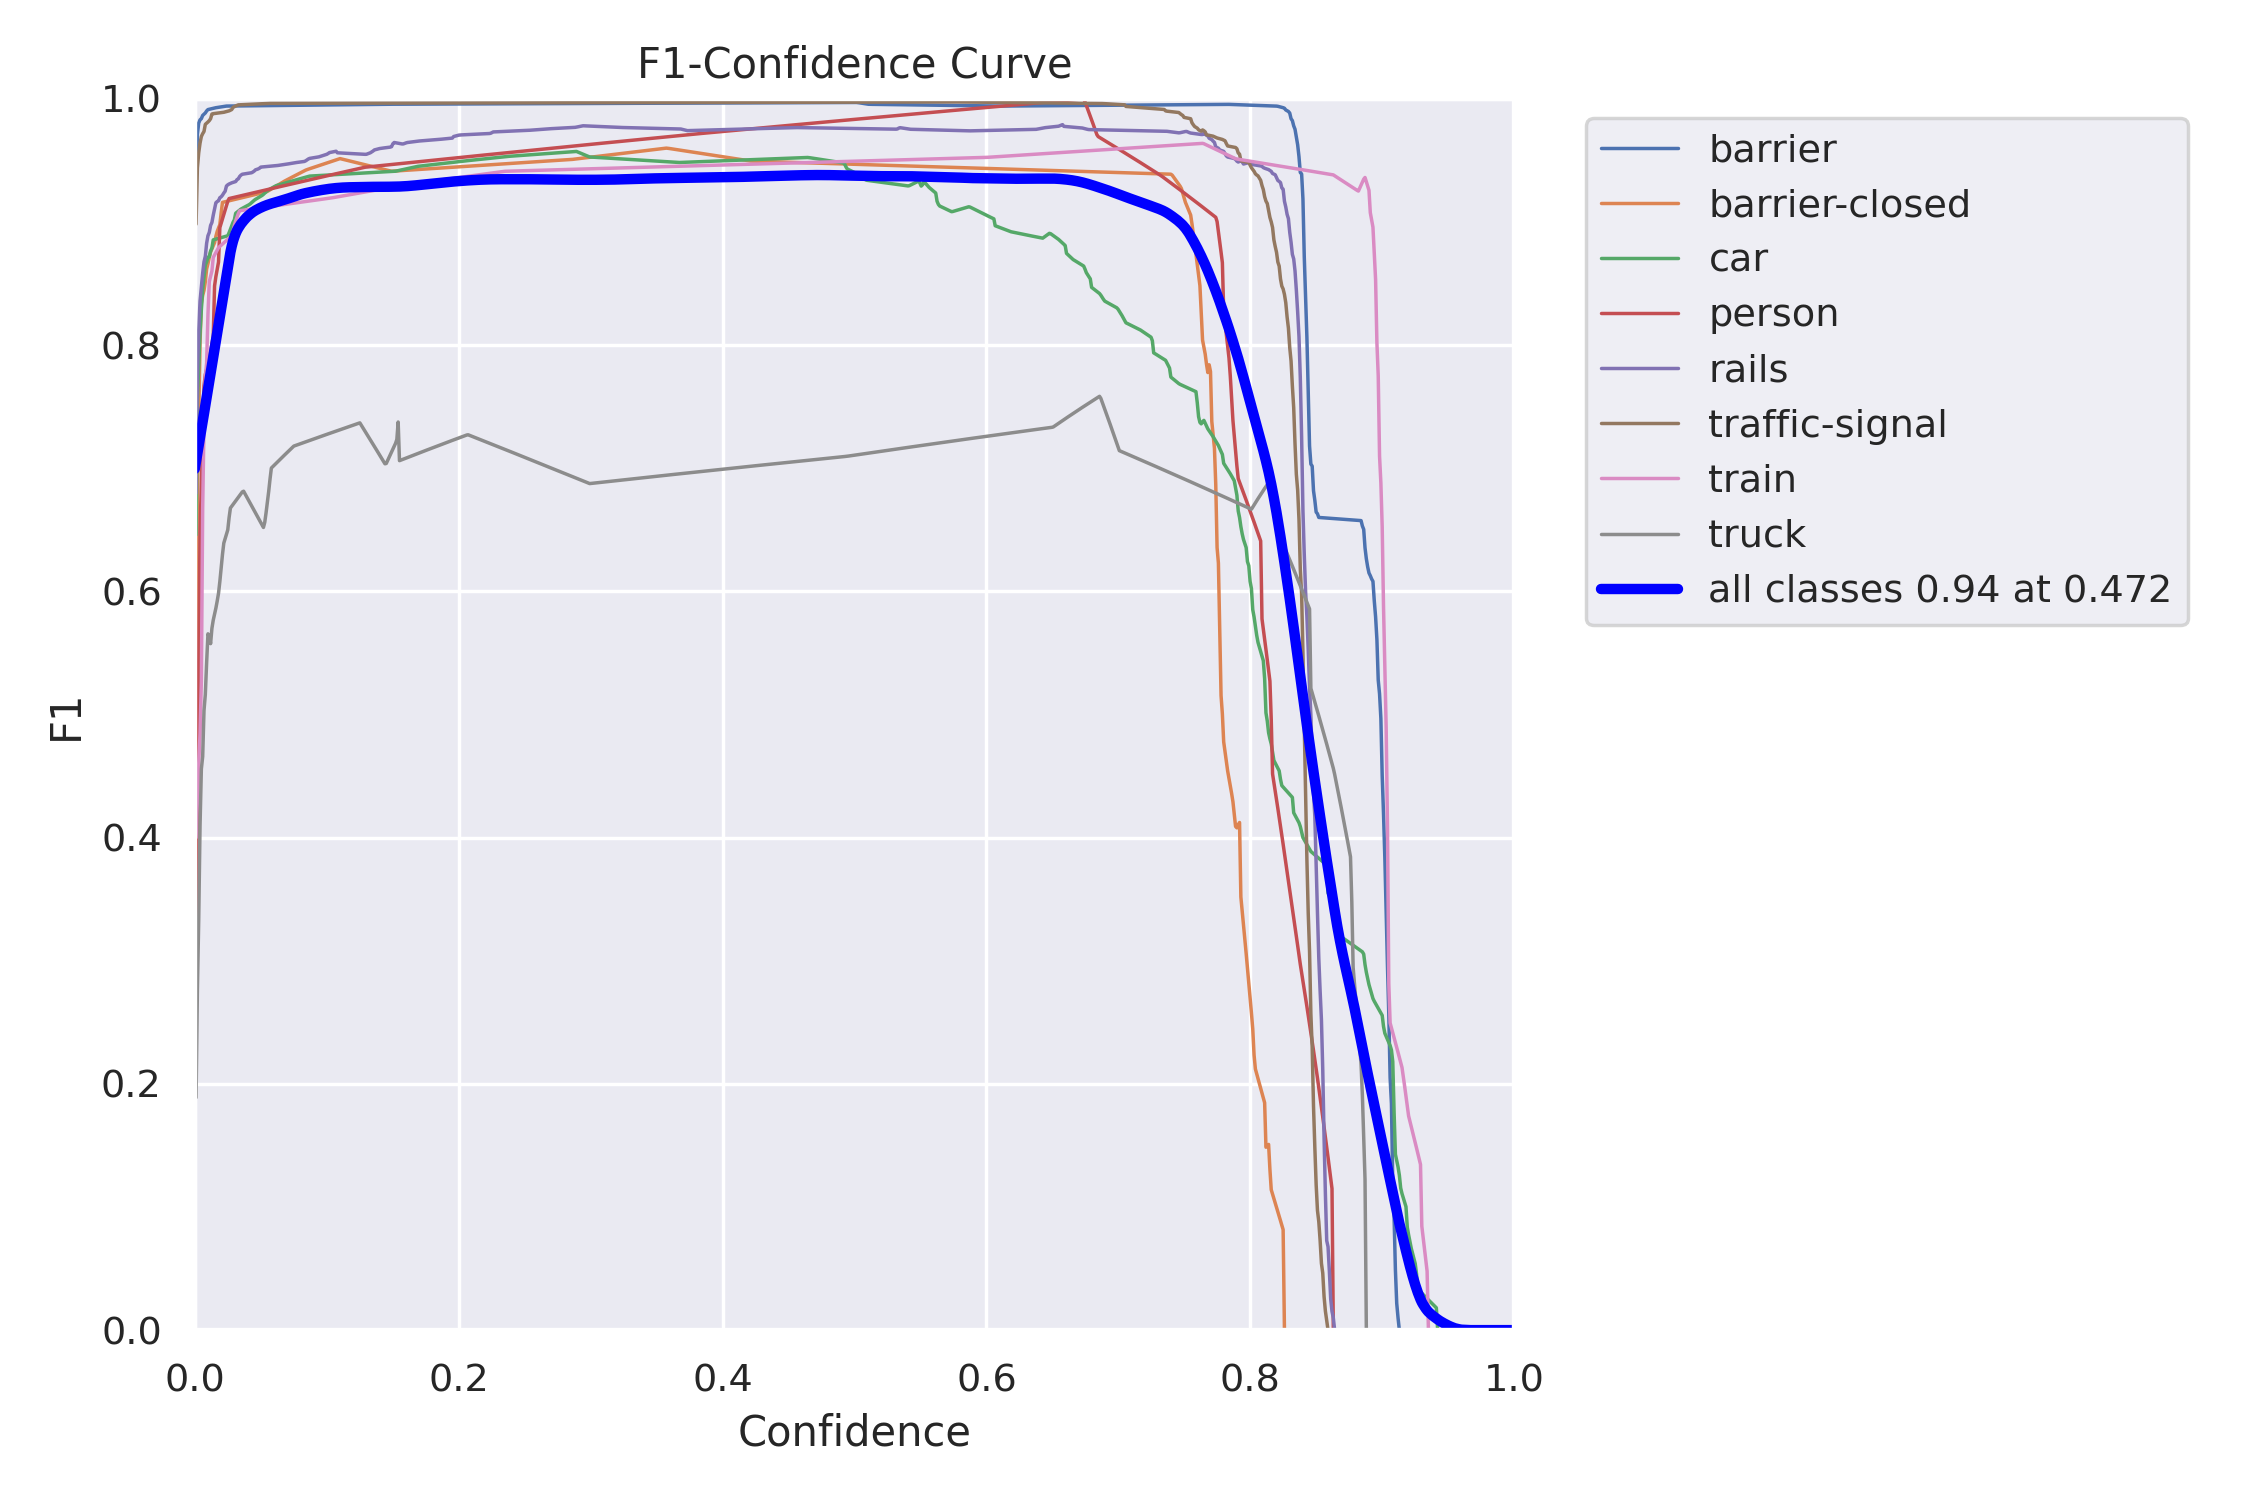

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=800)

/content/drive/MyDrive/ensembling-yolo8/YOLOv8x


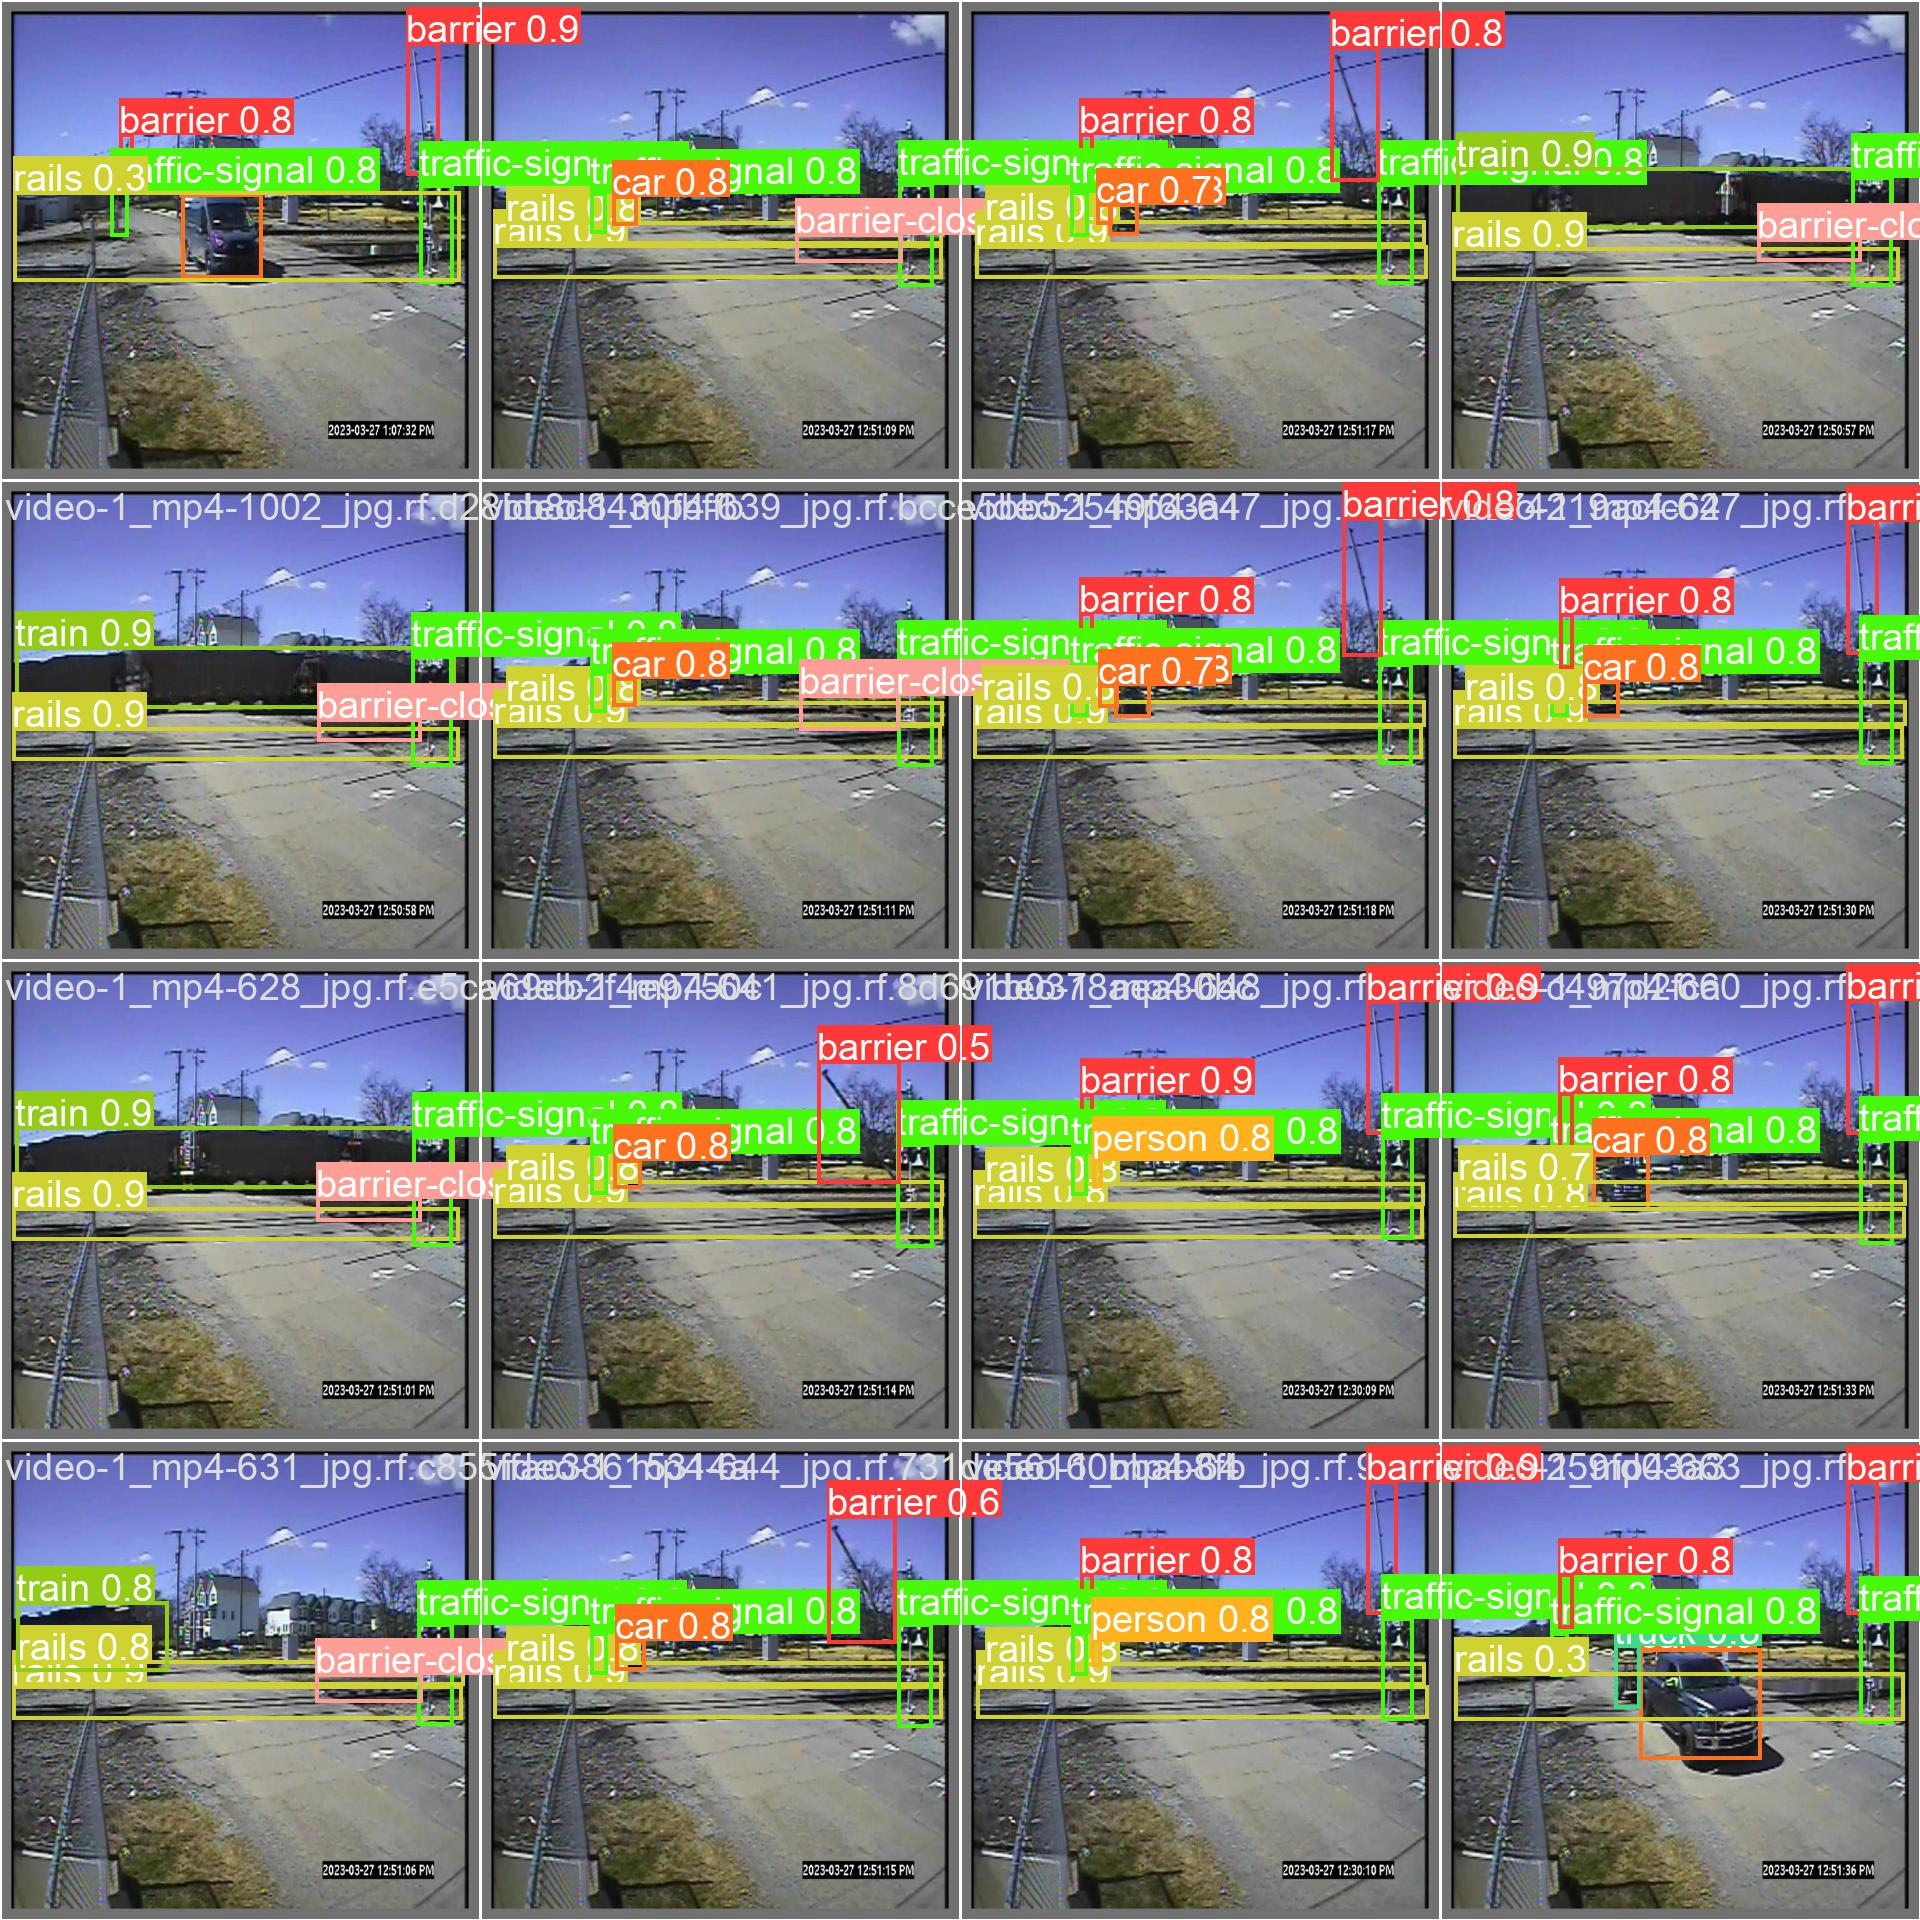

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=800)

## Validate Custom Model

In [30]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/ensembling-yolo8/YOLOv8x
2023-06-15 16:26:40.603639: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 16:26:42.305888: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68131272 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/drive/MyDrive/ensembling-yolo8/YOLOv8m/datasets/rail-road-crossing-4/valid/labels.cache... 224 images, 0 backgrounds, 0 corrupt: 100% 224/224 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:22<00:00,  1.58s/it]
                   all        224      

# Ensembling all three Yolov8m, Yolov8l, Yolov8x models for prediction


In [11]:
import os
os.chdir("/content/drive/MyDrive/ensembling-yolo8/")

directory_path = "/content/drive/MyDrive/ensembling-yolo8/"

In [17]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/ensembling-yolo8


In [19]:
######################## Loading trained YOLOv8x model ###############################
%cd {HOME}/YOLOv8x/runs/detect/train/weights/
from ultralytics import YOLO

model_yolov8x = YOLO('best.pt')
model_yolov8x.info()


/content/drive/MyDrive/ensembling-yolo8/YOLOv8x/runs/detect/train/weights


Model summary: 365 layers, 68160312 parameters, 0 gradients, 258.2 GFLOPs


In [20]:
######################## Loading trained YOLOv8m model ###############################
%cd {HOME}/YOLOv8m/runs/detect/train5/weights/
from ultralytics import YOLO

model_yolov8m = YOLO('best.pt')
model_yolov8m.info()


/content/drive/MyDrive/ensembling-yolo8/YOLOv8m/runs/detect/train5/weights


Model summary: 295 layers, 25860952 parameters, 0 gradients, 79.1 GFLOPs


In [23]:
######################## Loading trained YOLOv8m model ###############################
%cd {HOME}/YOLOv8l/runs/detect/train3/weights/
from ultralytics import YOLO

model_yolov8l = YOLO('best.pt')
model_yolov8l.info()


/content/drive/MyDrive/ensembling-yolo8/YOLOv8l/runs/detect/train3/weights


Model summary: 365 layers, 43636008 parameters, 0 gradients, 165.4 GFLOPs


In [70]:
####################### Ensembling all the models ################

import torch.nn as nn
import torch
import numpy as np
from google.colab.patches import cv2_imshow

class MyEnsemble(nn.Module):
    def __init__(self, modelA, modelB, modelC):
        super(MyEnsemble, self).__init__()
        self.modelA = modelA
        self.modelB = modelB
        self.modelC = modelC

    def forward(self, x):
        x1 = self.modelA(x)
        x2 = self.modelB(x)
        x3 = self.modelC(x)
        x = torch.stack((x1[0].boxes.data, x2[0].boxes.data, x3[0].boxes.data), 0).sum(dim=0).divide(3)
        return x1, x2, x3, x

esembled_yolov8 = MyEnsemble(model_yolov8m, model_yolov8l, model_yolov8x)
result_1, result_2, result_3, result_combined = esembled_yolov8("/content/drive/MyDrive/ensembling-yolo8/YOLOv8l/datasets/rail-road-crossing-4/test/images/video-1_mp4-1000_jpg.rf.faccbe251af811953b5374b8cf7b1bb8.jpg")
result_combined

tensor([[418.66666,  86.00000, 456.33334, 235.33333,   0.88640,   0.00000],
        [300.66666, 153.66667, 342.33334, 267.66666,   0.85925,   0.66667],
        [427.00000, 242.66667, 468.00000, 359.33334,   0.83313,   5.00000],
        [237.33333, 273.00000, 474.00000, 358.00000,   0.82538,   4.66667],
        [116.33334, 276.00000, 353.00000, 339.66666,   0.81535,   3.66667],
        [118.33334, 249.00000, 353.66666, 316.33334,   0.79104,   2.00000],
        [ 21.33333, 294.66666, 636.00000, 329.66666,   0.73647,   4.00000]])